In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = pd.read_csv("results.csv")
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25135,25141,1060,849,3,6,18,16,16,16,0.0,70,\N,\N,62,11,1:08.520,226.865,11
25136,25142,1060,20,117,5,11,17,17,17,0.0,69,\N,\N,51,8,1:08.420,227.196,4
25137,25143,1060,854,210,47,19,18,18,18,0.0,69,\N,\N,56,18,1:09.394,224.007,12
25138,25144,1060,853,210,9,20,19,19,19,0.0,69,\N,\N,49,19,1:09.757,222.842,12


In [4]:
driver_st = pd.read_csv('driver_standings.csv')
driver_st

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33120,70463,1060,839,12.0,13,13,0
33121,70462,1060,841,1.0,16,16,0
33122,70459,1060,852,9.0,14,14,0
33123,70457,1060,817,40.0,8,8,0


In [5]:
driver_st_drop = driver_st.drop(['driverStandingsId','position','positionText'],axis = 1)
driver_st_drop

,raceId,driverId,points,wins
0,18,1,10.0,1
1,18,2,8.0,0
2,18,3,6.0,0
3,18,4,5.0,0
4,18,5,4.0,0
...,...,...,...,...
33120,1060,839,12.0,0
33121,1060,841,1.0,0
33122,1060,852,9.0,0
33123,1060,817,40.0,0


In [6]:
#Drop the column with the same meanings and useless for the business problem
results_drop = results.drop(['statusId','number','resultId','fastestLapTime','positionText','time'],axis = 1)
results_drop

,raceId,driverId,constructorId,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,18,1,1,1,1,1,10.0,58,5690616,39,2,218.300
1,18,2,2,5,2,2,8.0,58,5696094,41,3,217.586
2,18,3,3,7,3,3,6.0,58,5698779,41,5,216.719
3,18,4,4,11,4,4,5.0,58,5707797,58,7,215.464
4,18,5,1,3,5,5,4.0,58,5708630,43,1,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...
25135,1060,849,3,18,16,16,0.0,70,\N,62,11,226.865
25136,1060,20,117,11,17,17,0.0,69,\N,51,8,227.196
25137,1060,854,210,19,18,18,0.0,69,\N,56,18,224.007
25138,1060,853,210,20,19,19,0.0,69,\N,49,19,222.842


In [7]:
driversresult_merge = pd.merge(driver_st_drop, results_drop, how = 'inner',left_on = ['driverId','raceId'],right_on = ['driverId','raceId'])
driversresult_merge

,raceId,driverId,points_x,wins,constructorId,grid,position,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,18,1,10.0,1,1,1,1,1,10.0,58,5690616,39,2,218.300
1,18,2,8.0,0,2,5,2,2,8.0,58,5696094,41,3,217.586
2,18,3,6.0,0,3,7,3,3,6.0,58,5698779,41,5,216.719
3,18,4,5.0,0,4,11,4,4,5.0,58,5707797,58,7,215.464
4,18,5,4.0,0,1,3,5,5,4.0,58,5708630,43,1,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,1060,839,12.0,0,214,17,\N,20,0.0,0,\N,\N,0,\N
24655,1060,841,1.0,0,51,15,14,14,0.0,70,\N,55,17,225.149
24656,1060,852,9.0,0,213,7,12,12,0.0,70,\N,54,9,227.080
24657,1060,817,40.0,0,1,13,7,7,6.0,71,5094938,56,14,225.876


In [8]:
driversresult_merge_drop = driversresult_merge.drop(['points_x'], axis = 1)
driversresult_merge_drop

,raceId,driverId,wins,constructorId,grid,position,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,18,1,1,1,1,1,1,10.0,58,5690616,39,2,218.300
1,18,2,0,2,5,2,2,8.0,58,5696094,41,3,217.586
2,18,3,0,3,7,3,3,6.0,58,5698779,41,5,216.719
3,18,4,0,4,11,4,4,5.0,58,5707797,58,7,215.464
4,18,5,0,1,3,5,5,4.0,58,5708630,43,1,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,1060,839,0,214,17,\N,20,0.0,0,\N,\N,0,\N
24655,1060,841,0,51,15,14,14,0.0,70,\N,55,17,225.149
24656,1060,852,0,213,7,12,12,0.0,70,\N,54,9,227.080
24657,1060,817,0,1,13,7,7,6.0,71,5094938,56,14,225.876


In [15]:
drivers = pd.read_csv("drivers.csv",encoding='gbk')
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,hamilton,44,HAM,Lewis,Hamilton,1985/1/7,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977/5/10,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,rosberg,6,ROS,Nico,Rosberg,1985/6/27,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,alonso,14,ALO,Fernando,Alonso,1981/7/29,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981/10/19,Finnish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996/6/25,Brazilian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,851,aitken,89,AIT,Jack,Aitken,1995/9/23,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000/5/11,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999/3/2,Russian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
drivers_drop = drivers.drop(['number','code','forename','surname','dob','driverRef'],axis = 1)
drivers_drop

,driverId,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Finnish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
848,850,Brazilian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,851,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,852,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,853,Russian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dr_result_nation = pd.merge(drivers_drop, driversresult_merge_drop, on = ['driverId'])
dr_result_nation

,driverId,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,...,constructorId,grid,position,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,1,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,10.0,58,5690616,39,2,218.300
1,1,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,9,5,5,4.0,56,5525103,53,3,209.033
2,1,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3,13,13,0.0,56,\N,25,19,203.969
3,1,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,5,3,3,6.0,66,5903238,20,3,204.323
4,1,British,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3,2,2,8.0,58,5213230,31,2,222.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,854,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210,20,18,18,0.0,75,\N,51,18,157.189
24655,854,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210,17,13,13,0.0,51,8030651,41,18,200.799
24656,854,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210,15,19,19,0.0,52,\N,51,17,212.765
24657,854,German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210,19,16,16,0.0,69,\N,57,16,222.052


In [18]:
races = pd.read_csv("races.csv")
races

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009/3/29,6:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009/4/5,9:00:00
2,3,2009,3,17,Chinese Grand Prix,2009/4/19,7:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009/4/26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009/5/10,12:00:00
...,...,...,...,...,...,...,...
1053,1069,2021,18,69,United States Grand Prix,2021/10/24,19:00:00
1054,1070,2021,19,32,Mexico City Grand Prix,2021/10/31,19:00:00
1055,1071,2021,20,18,Brazilian Grand Prix,2021/11/7,17:00:00
1056,1072,2021,22,77,Saudi Arabian Grand Prix,2021/12/5,16:00:00


In [19]:
data = list(races.columns[2:])
races_drop = races.drop(data,axis = 1)
races_drop

,raceId,year
0,1,2009
1,2,2009
2,3,2009
3,4,2009
4,5,2009
...,...,...
1053,1069,2021
1054,1070,2021
1055,1071,2021
1056,1072,2021


In [20]:
races_results1 = pd.merge(races_drop, dr_result_nation, on = ['raceId'])
races_results1

,raceId,year,driverId,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,constructorId,grid,position,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,1,2009,2,German,NaN,NaN,NaN,NaN,NaN,NaN,...,2,9,10,10,0.0,58,5662869,48,5,216.245
1,1,2009,3,German,NaN,NaN,NaN,NaN,NaN,NaN,...,3,5,6,6,3.0,58,5661506,48,1,217.668
2,1,2009,4,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,...,4,10,5,5,4.0,58,5660663,53,9,215.199
3,1,2009,7,French,NaN,NaN,NaN,NaN,NaN,NaN,...,5,17,8,8,1.0,58,5662082,50,17,212.537
4,1,2009,8,Finnish,NaN,NaN,FP 练习赛,NaN,NaN,NaN,...,6,7,15,15,0.0,55,\N,35,7,215.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,1060,2021,847,British,NaN,NaN,NaN,NaN,NaN,NaN,...,3,8,11,11,0.0,70,\N,56,16,225.613
24655,1060,2021,849,Canadian,NaN,NaN,NaN,NaN,NaN,NaN,...,3,18,16,16,0.0,70,\N,62,11,226.865
24656,1060,2021,852,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,...,213,7,12,12,0.0,70,\N,54,9,227.080
24657,1060,2021,853,Russian,NaN,NaN,NaN,NaN,NaN,NaN,...,210,20,19,19,0.0,69,\N,49,19,222.842


In [21]:
races_results = races_results1.drop(['position'],axis = 1)
races_results

,raceId,year,driverId,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,1,2009,2,German,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,9,10,0.0,58,5662869,48,5,216.245
1,1,2009,3,German,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,5,6,3.0,58,5661506,48,1,217.668
2,1,2009,4,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,10,5,4.0,58,5660663,53,9,215.199
3,1,2009,7,French,NaN,NaN,NaN,NaN,NaN,NaN,...,0,5,17,8,1.0,58,5662082,50,17,212.537
4,1,2009,8,Finnish,NaN,NaN,FP 练习赛,NaN,NaN,NaN,...,0,6,7,15,0.0,55,\N,35,7,215.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,1060,2021,847,British,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,8,11,0.0,70,\N,56,16,225.613
24655,1060,2021,849,Canadian,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,18,16,0.0,70,\N,62,11,226.865
24656,1060,2021,852,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,...,0,213,7,12,0.0,70,\N,54,9,227.080
24657,1060,2021,853,Russian,NaN,NaN,NaN,NaN,NaN,NaN,...,0,210,20,19,0.0,69,\N,49,19,222.842


In [22]:
def missing(x):
    if str(x) == '\\N':
        return 0

    else:
        return int(x)
    
races_results['milliseconds'] = races_results['milliseconds'].apply(missing)
races_results['fastestLap'] = races_results['fastestLap'].apply(missing)
races_results['rank'] = races_results['rank'].apply(missing)


In [23]:
def missing(x):
    if str(x) == '\\N':
        return 0

    else:
        return float(x)

races_results['fastestLapSpeed'] = races_results['fastestLapSpeed'].apply(missing)

In [24]:
races_results

,raceId,year,driverId,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,1,2009,2,German,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,9,10,0.0,58,5662869,48,5,216.245
1,1,2009,3,German,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,5,6,3.0,58,5661506,48,1,217.668
2,1,2009,4,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,10,5,4.0,58,5660663,53,9,215.199
3,1,2009,7,French,NaN,NaN,NaN,NaN,NaN,NaN,...,0,5,17,8,1.0,58,5662082,50,17,212.537
4,1,2009,8,Finnish,NaN,NaN,FP 练习赛,NaN,NaN,NaN,...,0,6,7,15,0.0,55,0,35,7,215.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,1060,2021,847,British,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,8,11,0.0,70,0,56,16,225.613
24655,1060,2021,849,Canadian,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,18,16,0.0,70,0,62,11,226.865
24656,1060,2021,852,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,...,0,213,7,12,0.0,70,0,54,9,227.080
24657,1060,2021,853,Russian,NaN,NaN,NaN,NaN,NaN,NaN,...,0,210,20,19,0.0,69,0,49,19,222.842


In [25]:
races_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24659 entries, 0 to 24658
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           24659 non-null  int64  
 1   year             24659 non-null  int64  
 2   driverId         24659 non-null  int64  
 3   nationality      24659 non-null  object 
 4   Unnamed: 8       0 non-null      float64
 5   Unnamed: 9       0 non-null      float64
 6   Unnamed: 10      1264 non-null   object 
 7   Unnamed: 11      594 non-null    object 
 8   Unnamed: 12      0 non-null      float64
 9   Unnamed: 13      0 non-null      float64
 10  Unnamed: 14      93 non-null     float64
 11  Unnamed: 15      93 non-null     float64
 12  wins             24659 non-null  int64  
 13  constructorId    24659 non-null  int64  
 14  grid             24659 non-null  int64  
 15  positionOrder    24659 non-null  int64  
 16  points_y         24659 non-null  float64
 17  laps        

In [26]:
races_results[['year','nationality','wins']]
wins_sum = races_results.wins.sum()
wins_sum

8437

In [27]:
df = races_results[['year','nationality','wins']].groupby(['year','nationality']).sum()
df

wins
year nationality      
1950 American        1
     Argentine      13
     Belgian         0
     British         0
     French          0
...                ...
2021 Japanese        0
     Mexican         4
     Monegasque      0
     Russian         0
     Spanish         0

[1000 rows x 1 columns]

In [28]:
nation = df[['wins']].groupby(['nationality']).sum()
nation

,wins
nationality,
American,153
American-Italian,0
Argentine,229
Argentine-Italian,0
Australian,320
Austrian,274
Belgian,55
Brazilian,853
British,2404


In [29]:
nation_ratio = nation.wins.values / wins_sum
nation['nation_ratio'] = nation_ratio
nation = nation.sort_values('nation_ratio',ascending=False)
nation

,wins,nation_ratio
nationality,,
British,2404,0.284935
German,1716,0.203390
Brazilian,853,0.101102
French,699,0.082849
Finnish,486,0.057603
Spanish,346,0.041010
Australian,320,0.037928
Austrian,274,0.032476
Italian,270,0.032002


In [30]:
winratio = df.wins.values /  wins_sum
df['winratio'] = winratio
year_list = []
nationality_list = []
for i in df.index:
    year_list.append(i[0])
    nationality_list.append(i[1])
df['year'] = year_list
df['nationality'] = nationality_list
list1 = df.nationality.to_list()
list2 = list(set(list1))
list2
year = df.year.to_list()
nationality = df.nationality.to_list()
winratio_1 = df.winratio.to_list()

def data(l):
    list3 = []
    for y,n,w in zip(year,nationality,winratio_1):
        if n == l:
            list3.append([y,w,n])
    return list3

list4 = []
for l in list2:
    d = data(l)
    list4.append(d)
list4
      


[[[2001, 0.0, 'Czech']],
 [[1950, 0.0, 'Monegasque'],
  [1951, 0.0, 'Monegasque'],
  [1953, 0.0, 'Monegasque'],
  [1955, 0.0, 'Monegasque'],
  [1956, 0.0, 'Monegasque'],
  [1958, 0.0, 'Monegasque'],
  [1959, 0.0, 'Monegasque'],
  [1994, 0.0, 'Monegasque'],
  [2018, 0.0, 'Monegasque'],
  [2019, 0.002014934218324049, 'Monegasque'],
  [2020, 0.0, 'Monegasque'],
  [2021, 0.0, 'Monegasque']],
 [[1952, 0.0, 'Dutch'],
  [1957, 0.0, 'Dutch'],
  [1958, 0.0, 'Dutch'],
  [1959, 0.0, 'Dutch'],
  [1960, 0.0, 'Dutch'],
  [1961, 0.0, 'Dutch'],
  [1962, 0.0, 'Dutch'],
  [1963, 0.0, 'Dutch'],
  [1964, 0.0, 'Dutch'],
  [1971, 0.0, 'Dutch'],
  [1973, 0.0, 'Dutch'],
  [1974, 0.0, 'Dutch'],
  [1975, 0.0, 'Dutch'],
  [1976, 0.0, 'Dutch'],
  [1977, 0.0, 'Dutch'],
  [1978, 0.0, 'Dutch'],
  [1979, 0.0, 'Dutch'],
  [1980, 0.0, 'Dutch'],
  [1981, 0.0, 'Dutch'],
  [1982, 0.0, 'Dutch'],
  [1984, 0.0, 'Dutch'],
  [1985, 0.0, 'Dutch'],
  [1986, 0.0, 'Dutch'],
  [1992, 0.0, 'Dutch'],
  [1994, 0.0, 'Dutch'],
  [1995, 

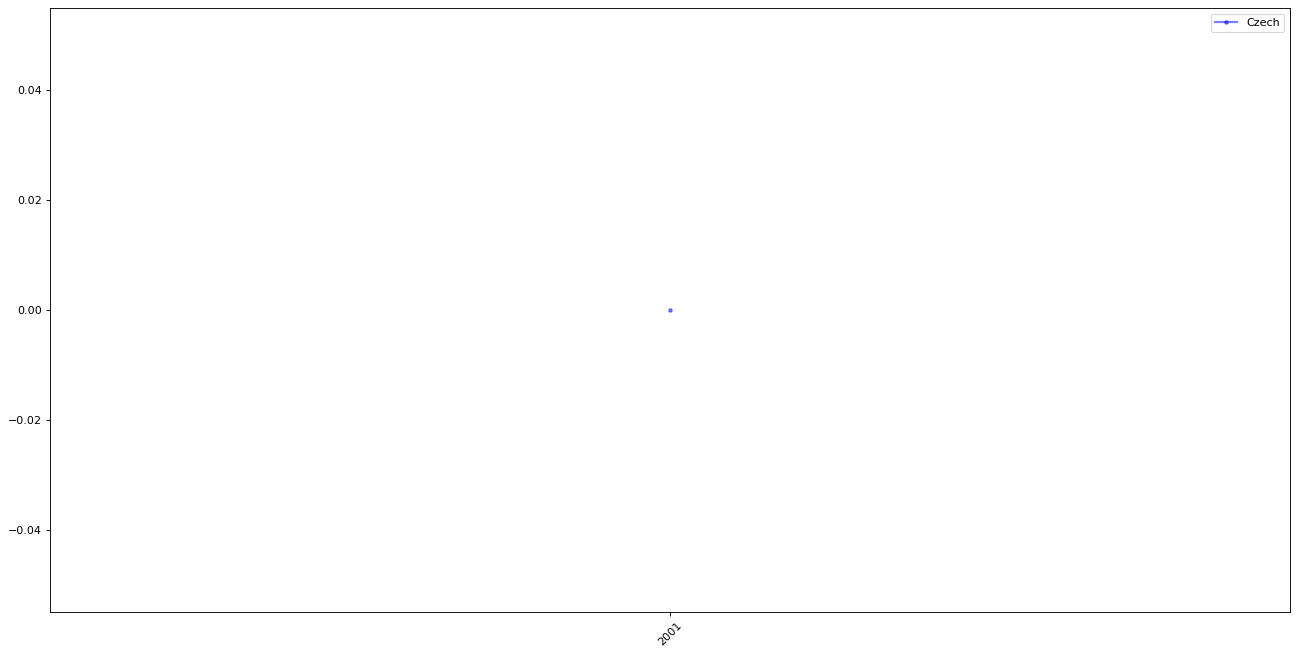

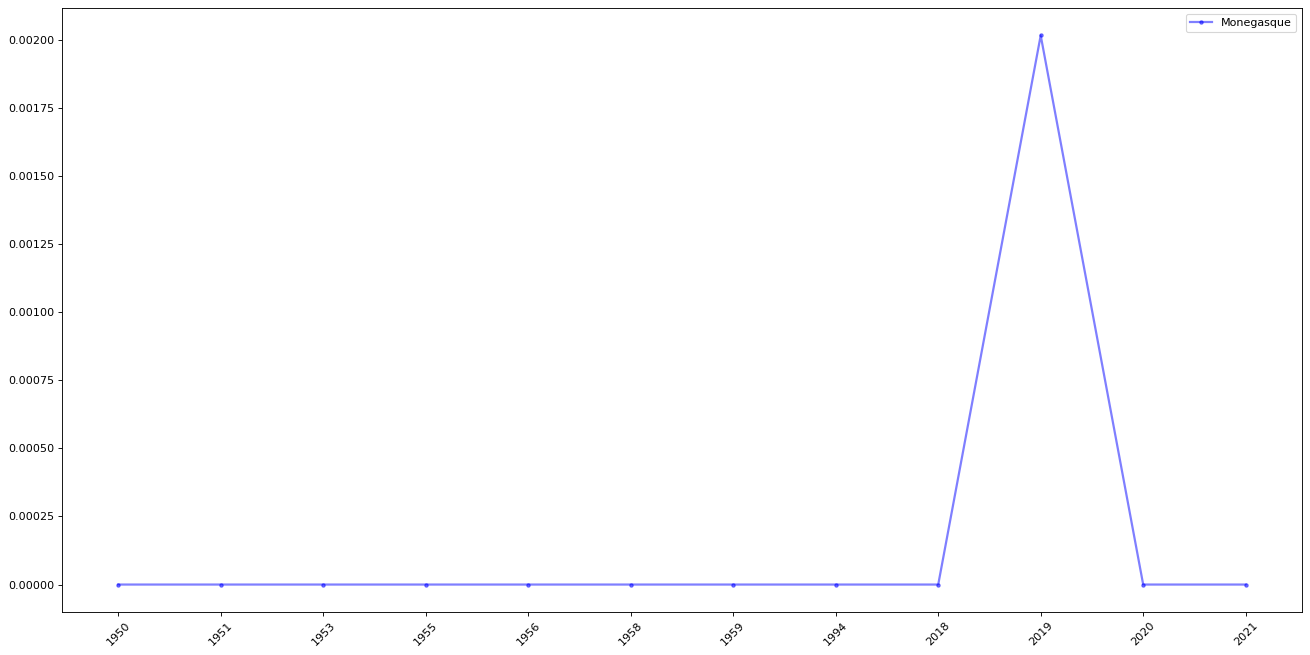

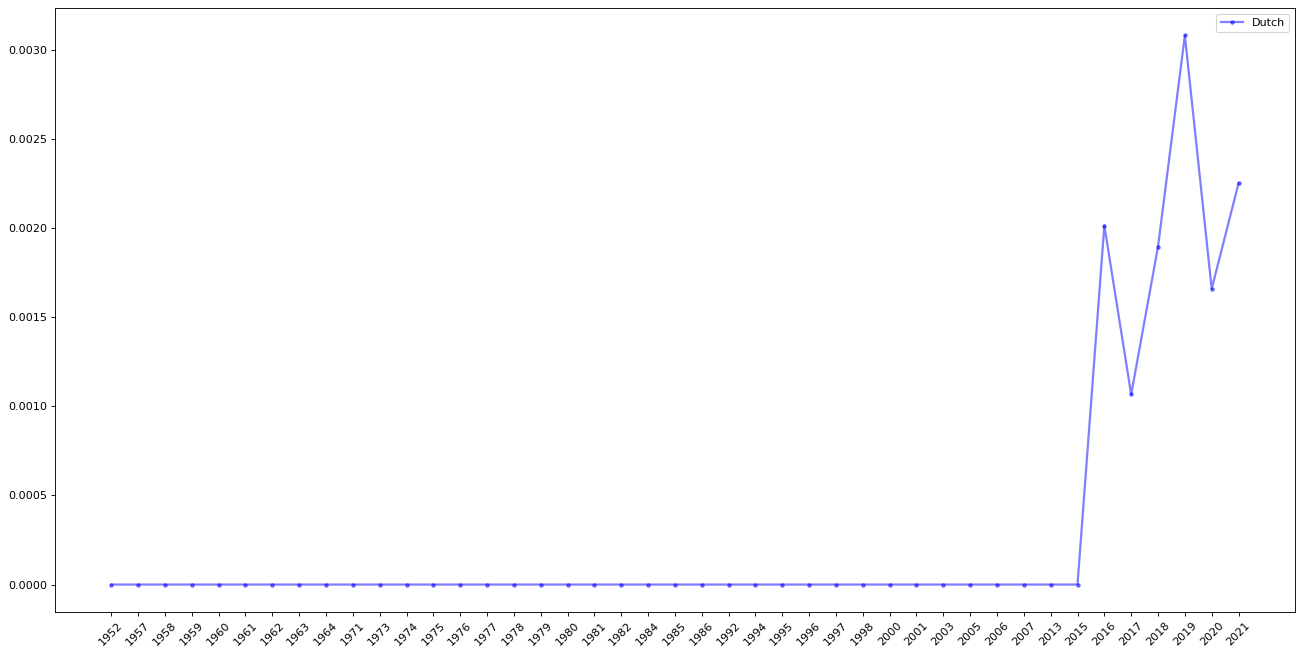

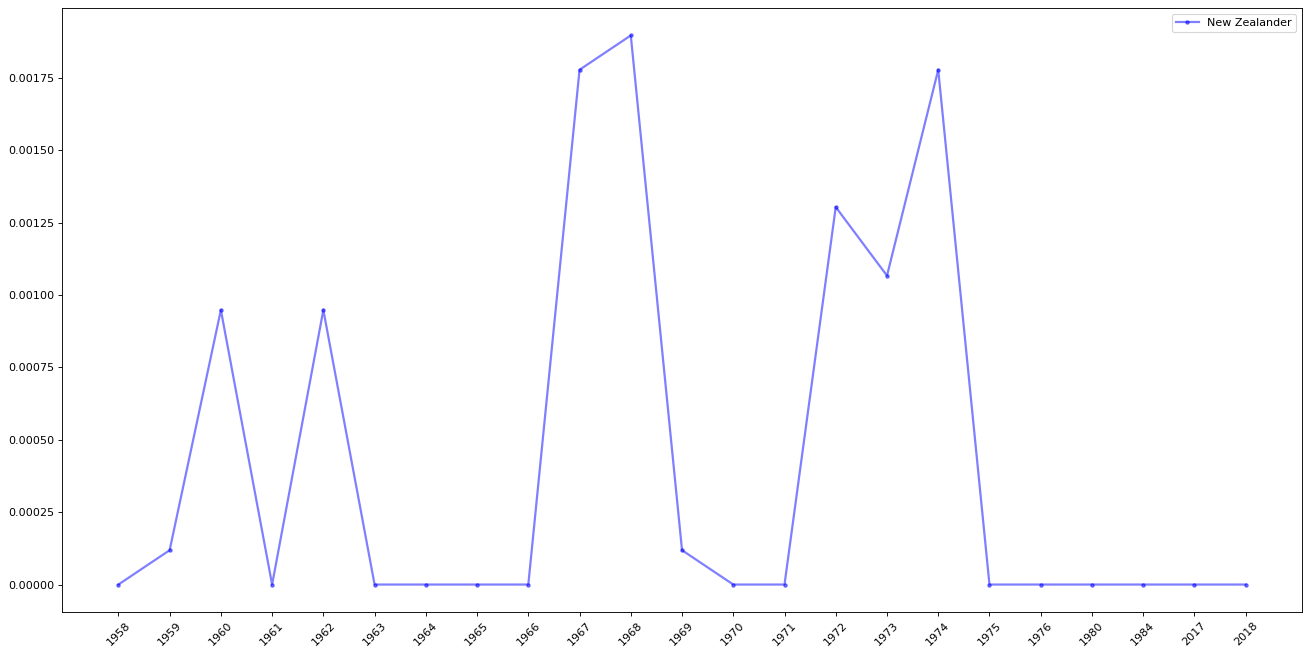

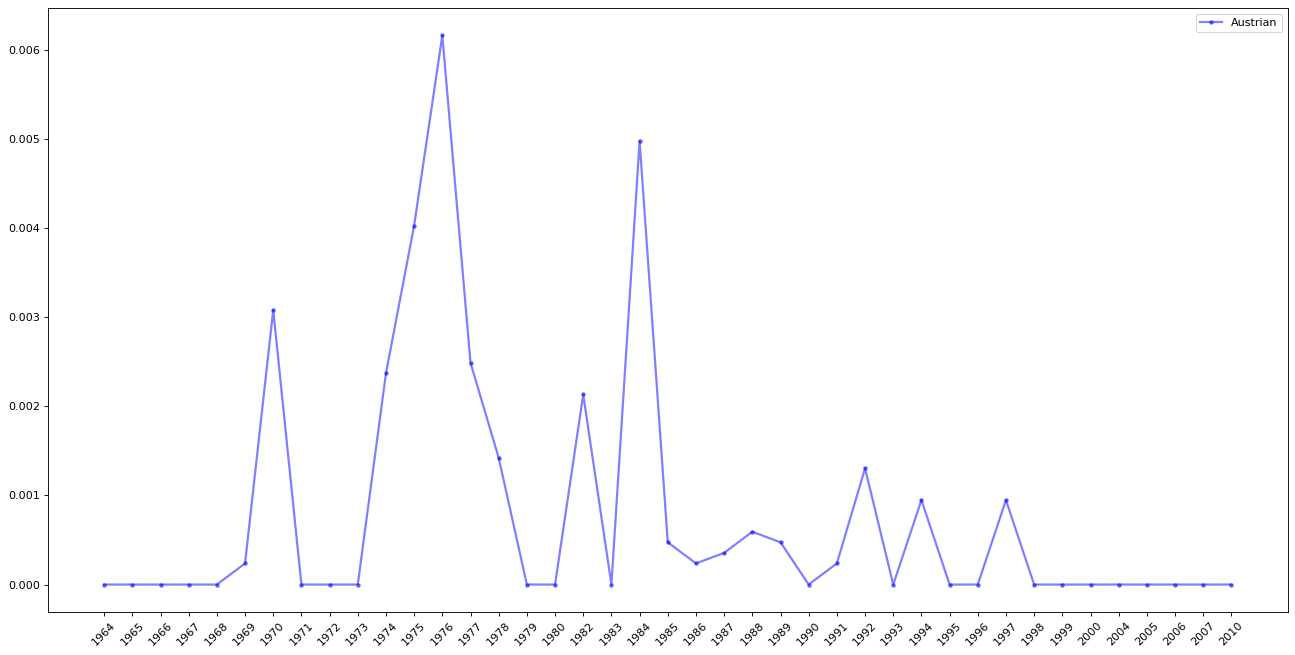

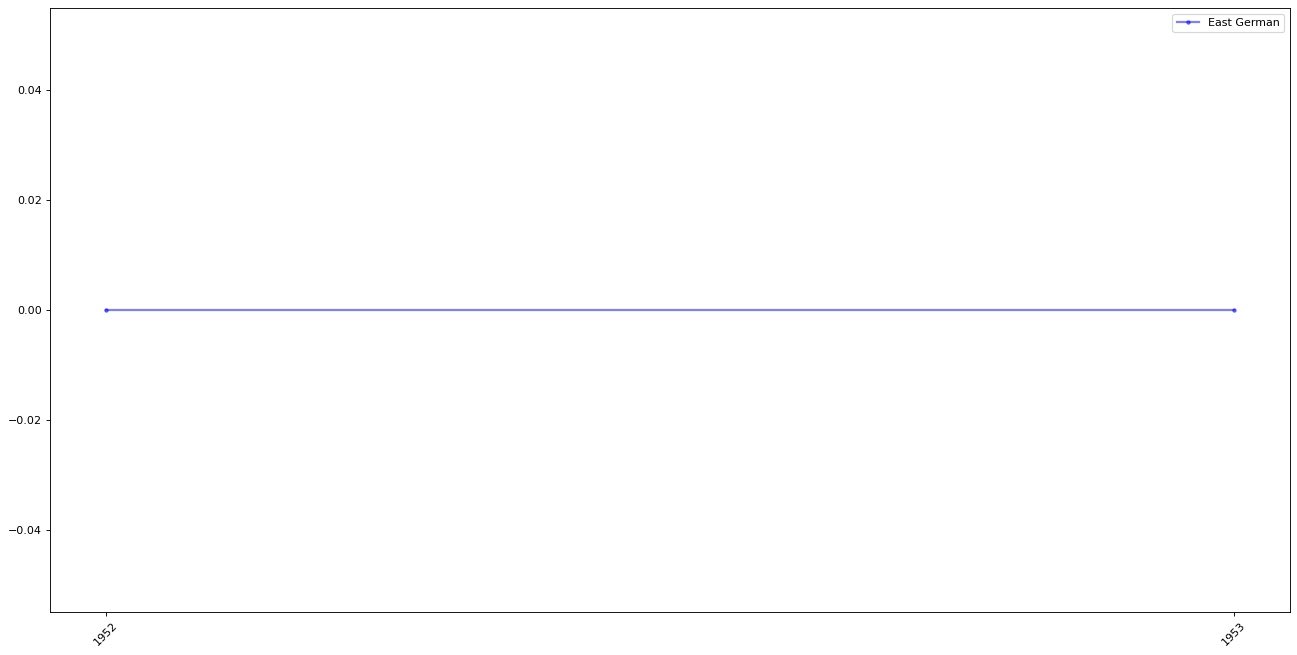

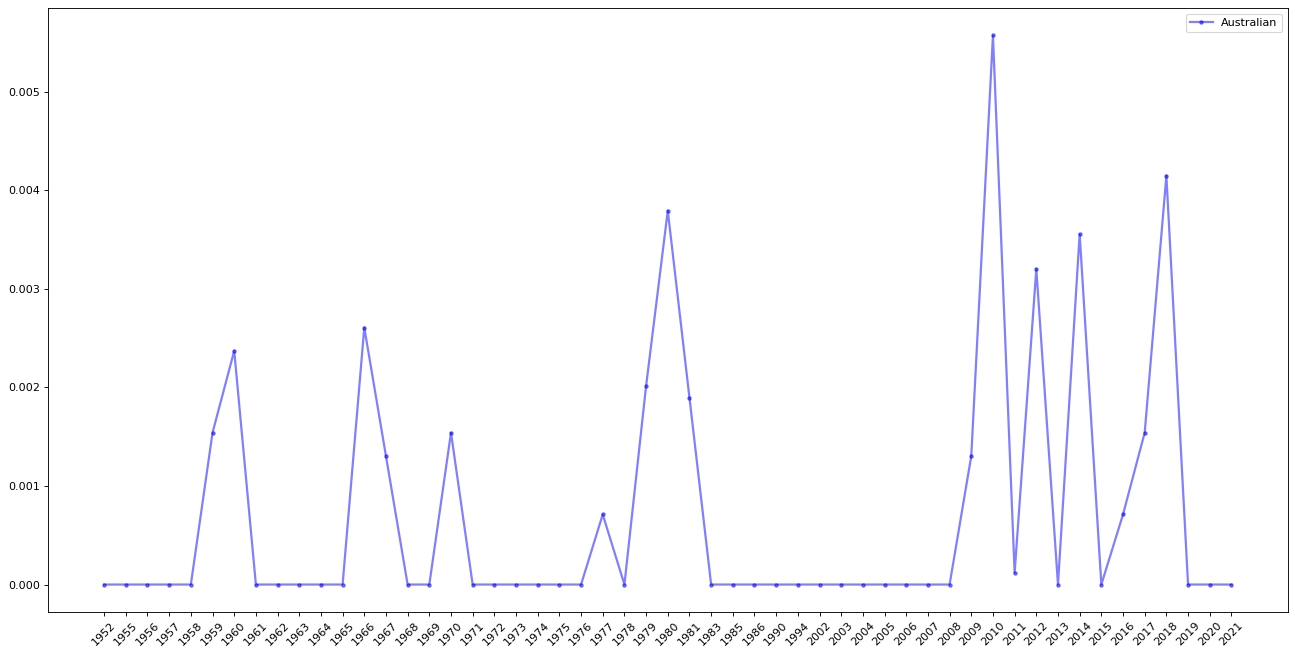

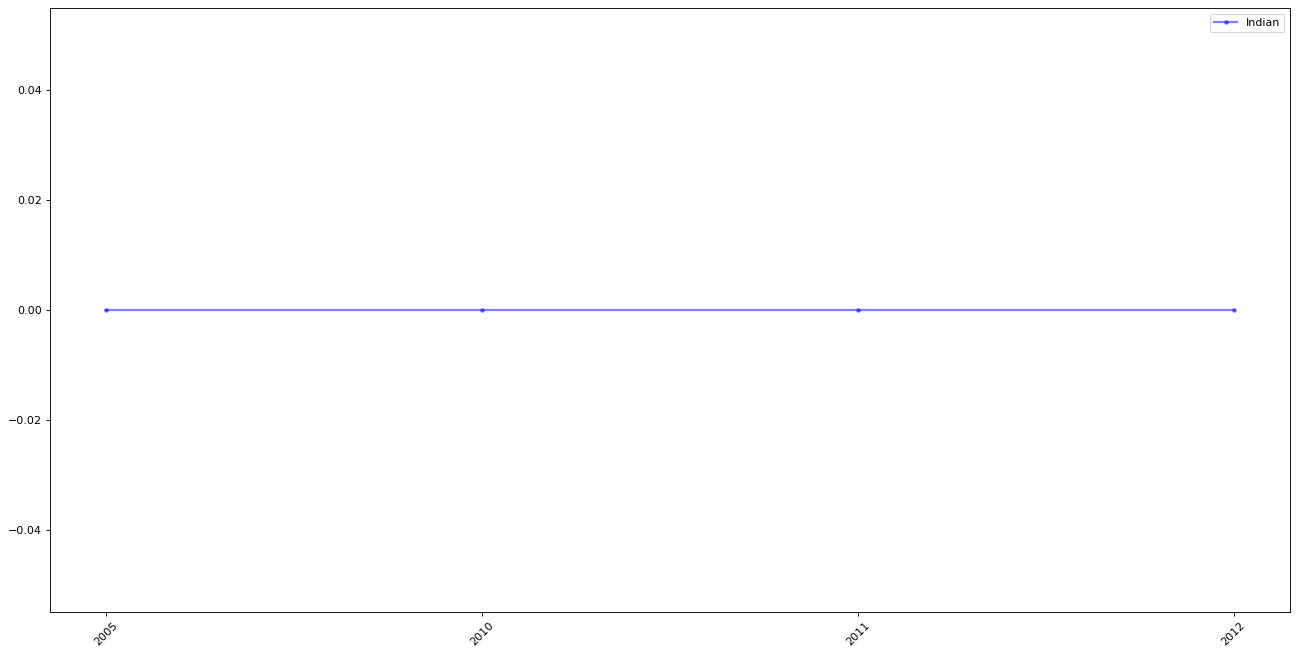

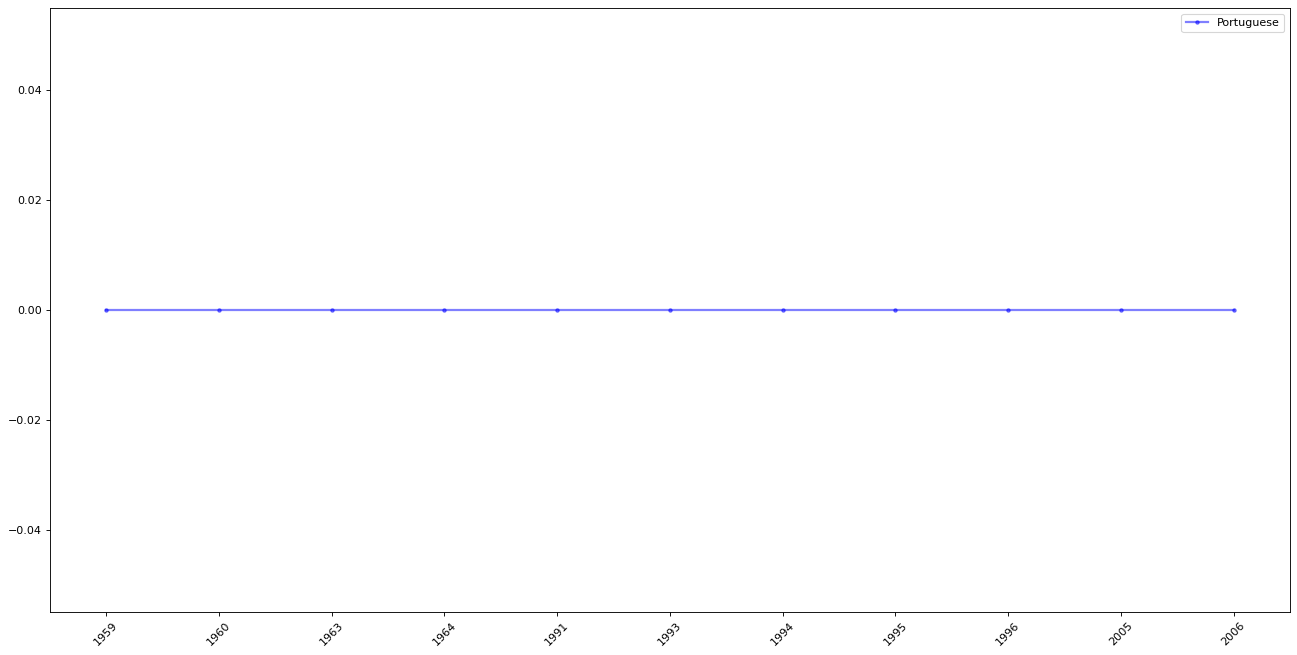

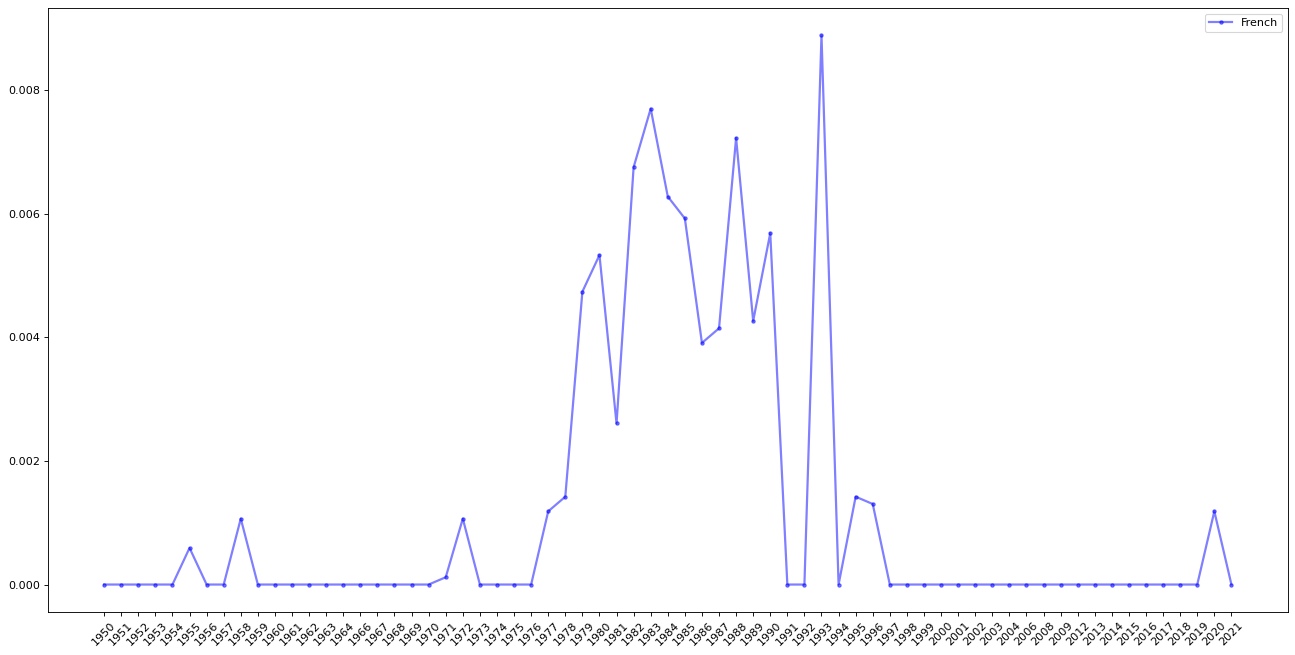

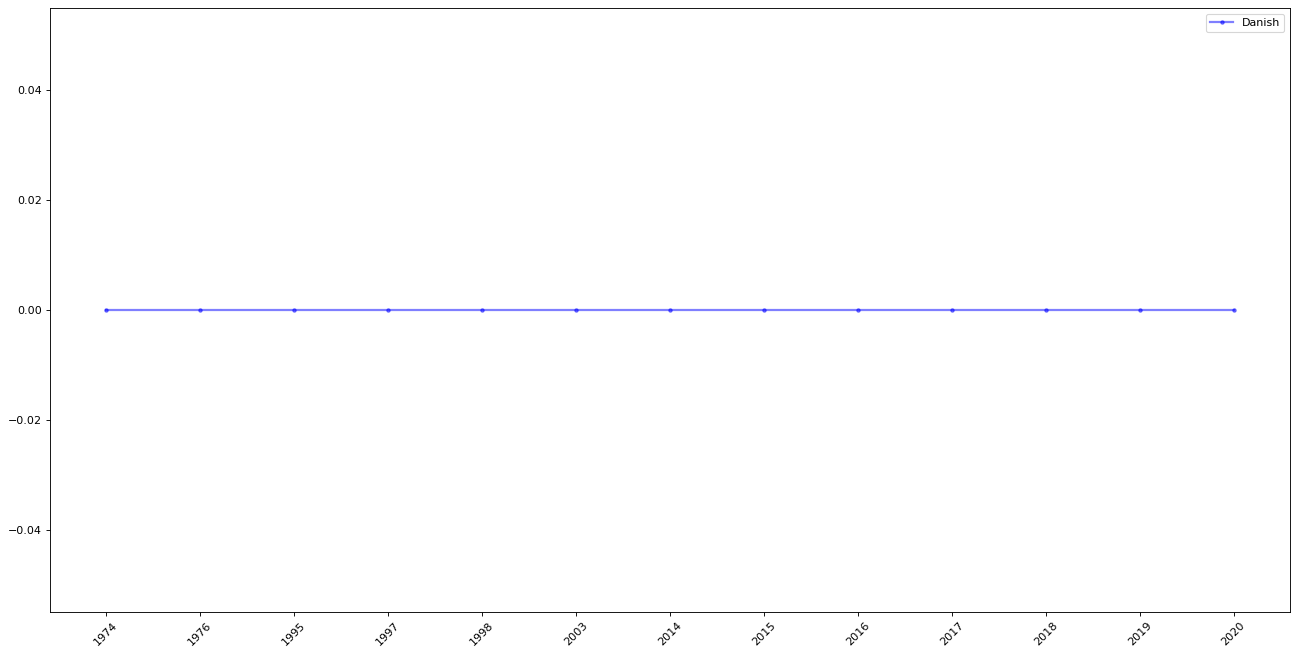

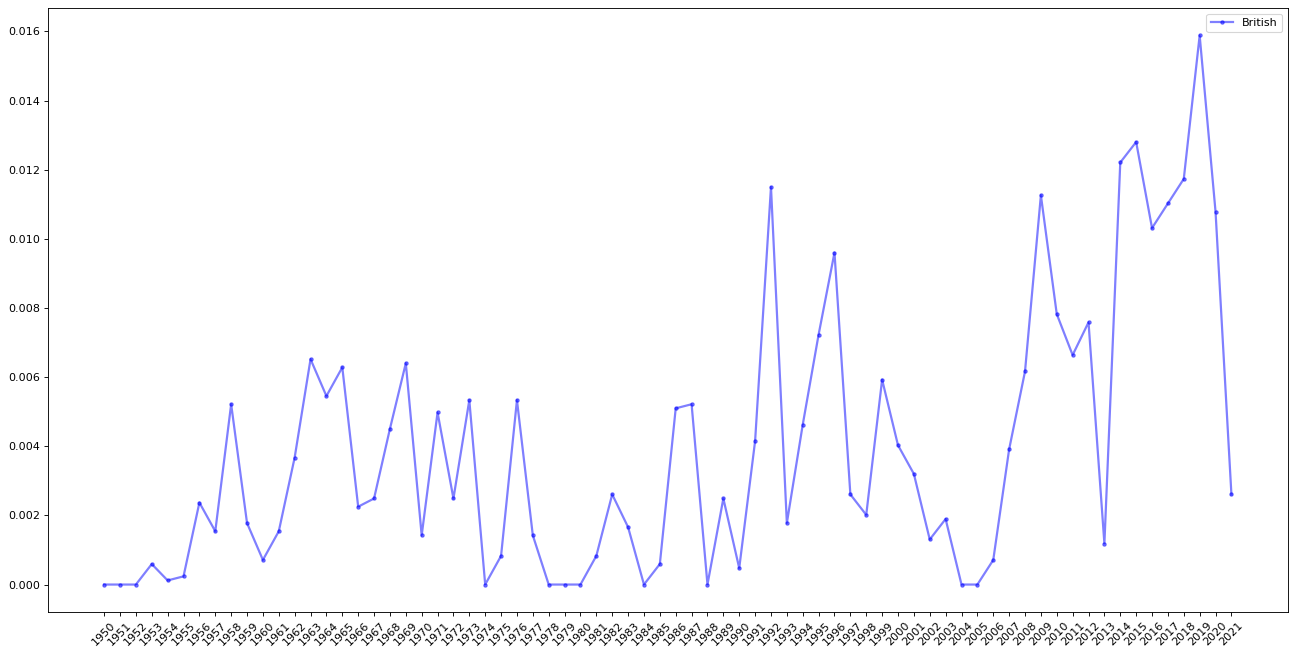

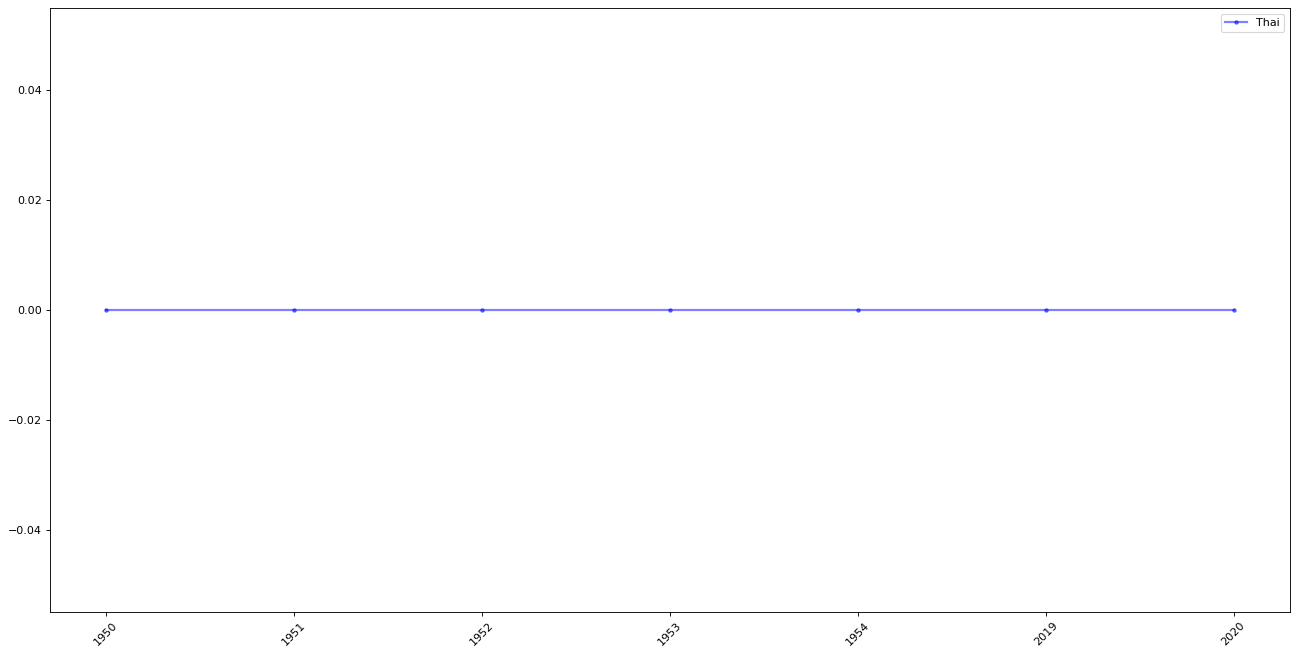

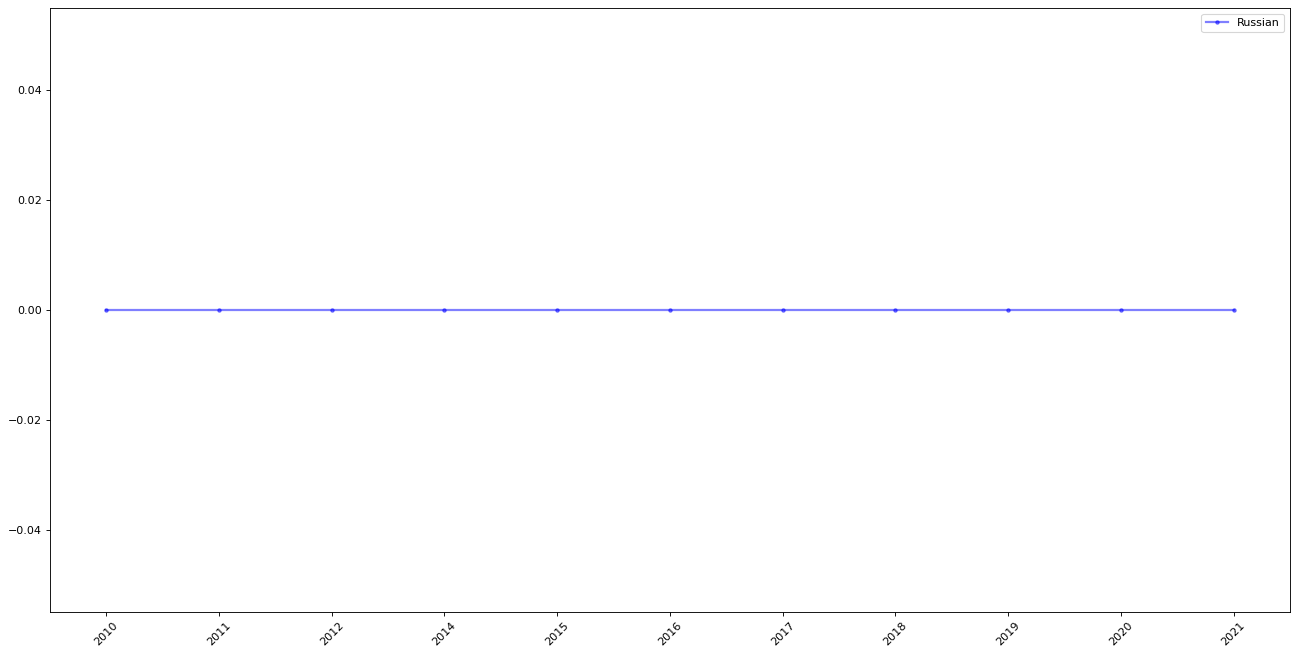

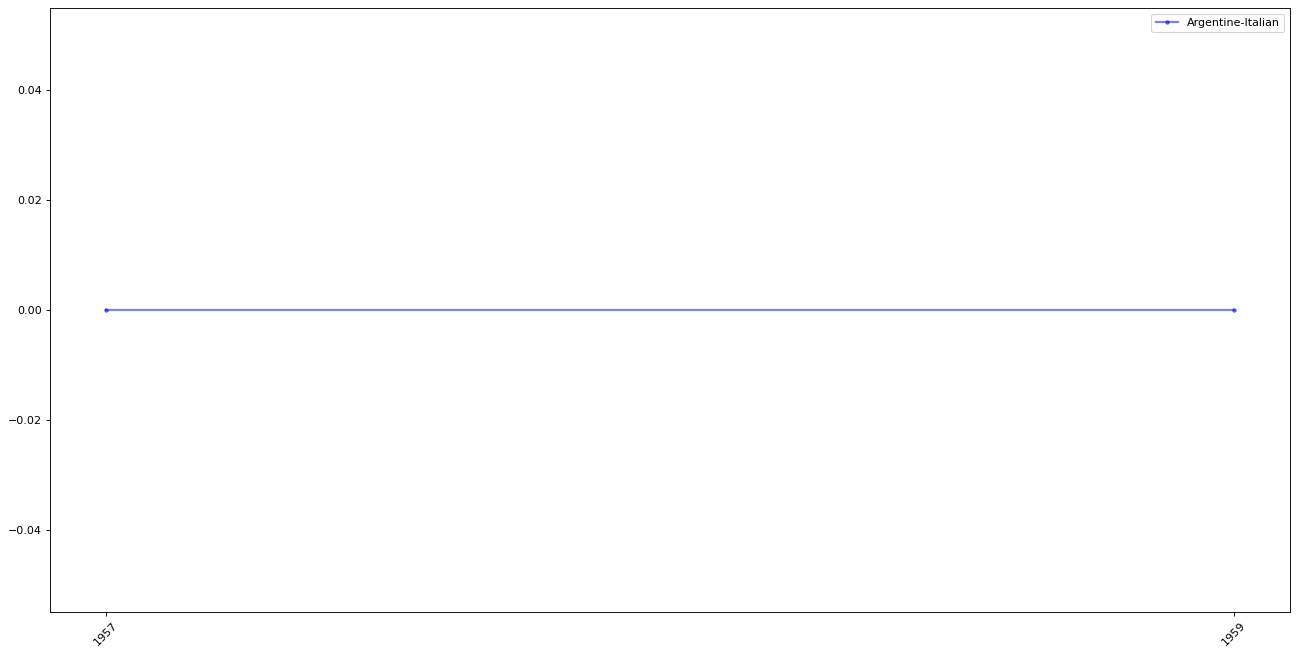

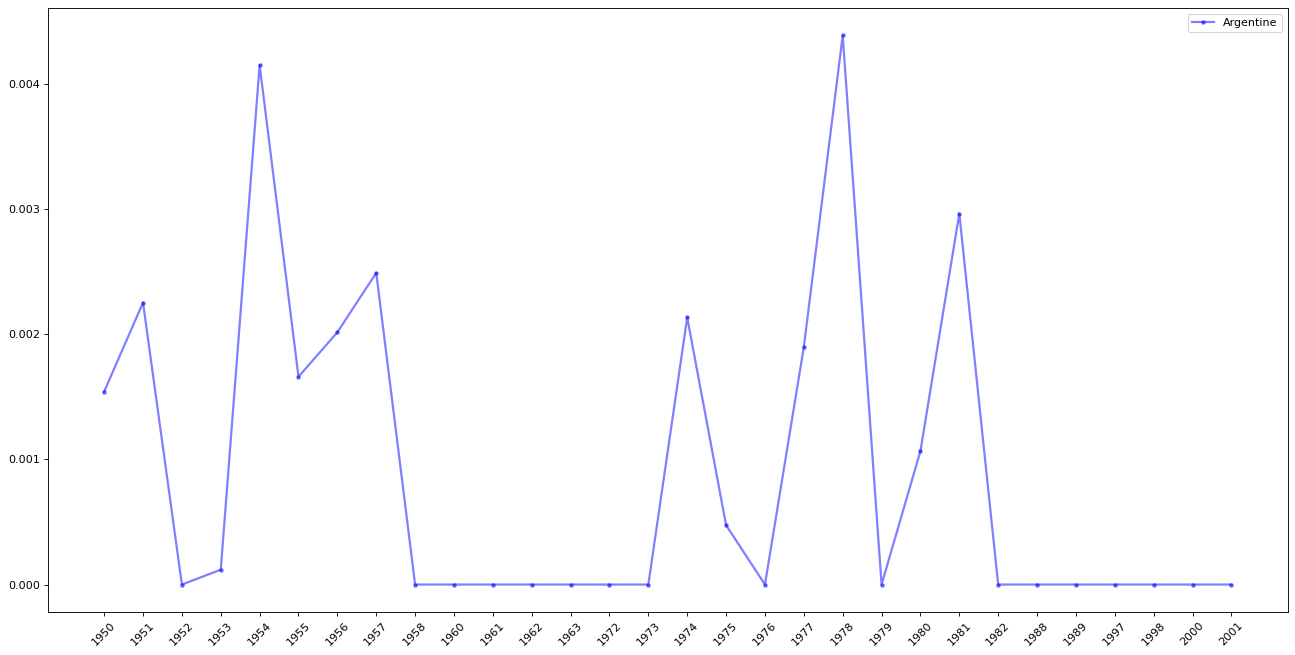

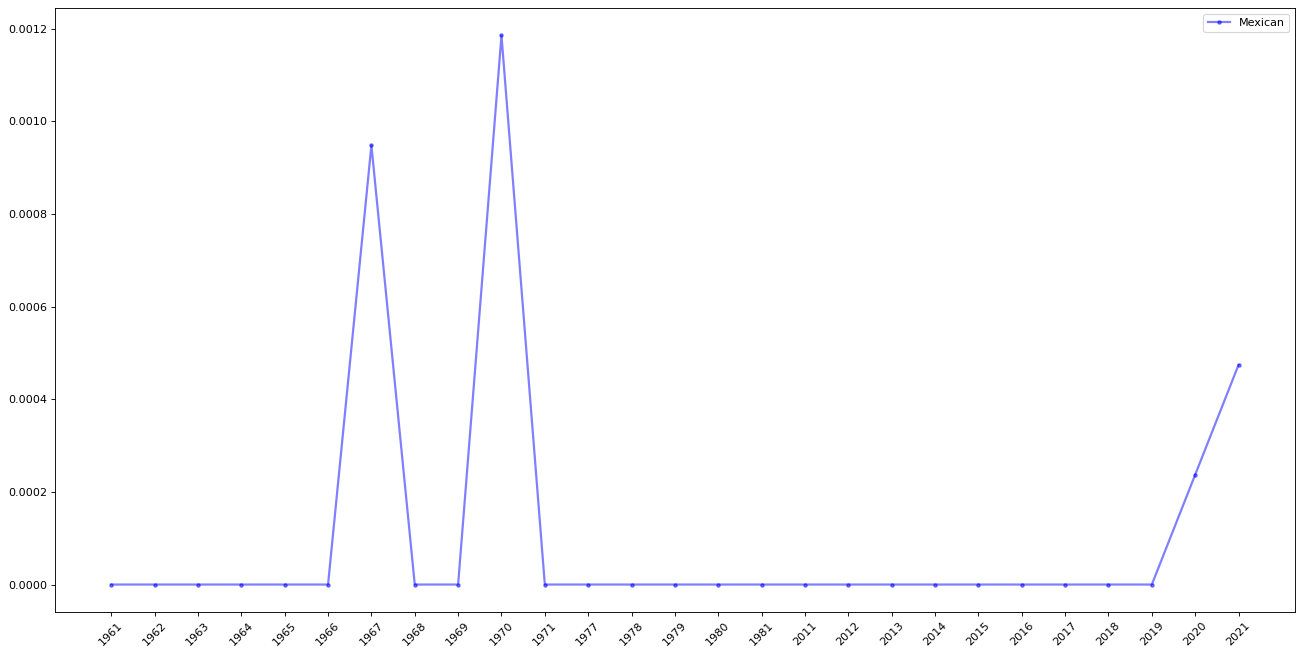

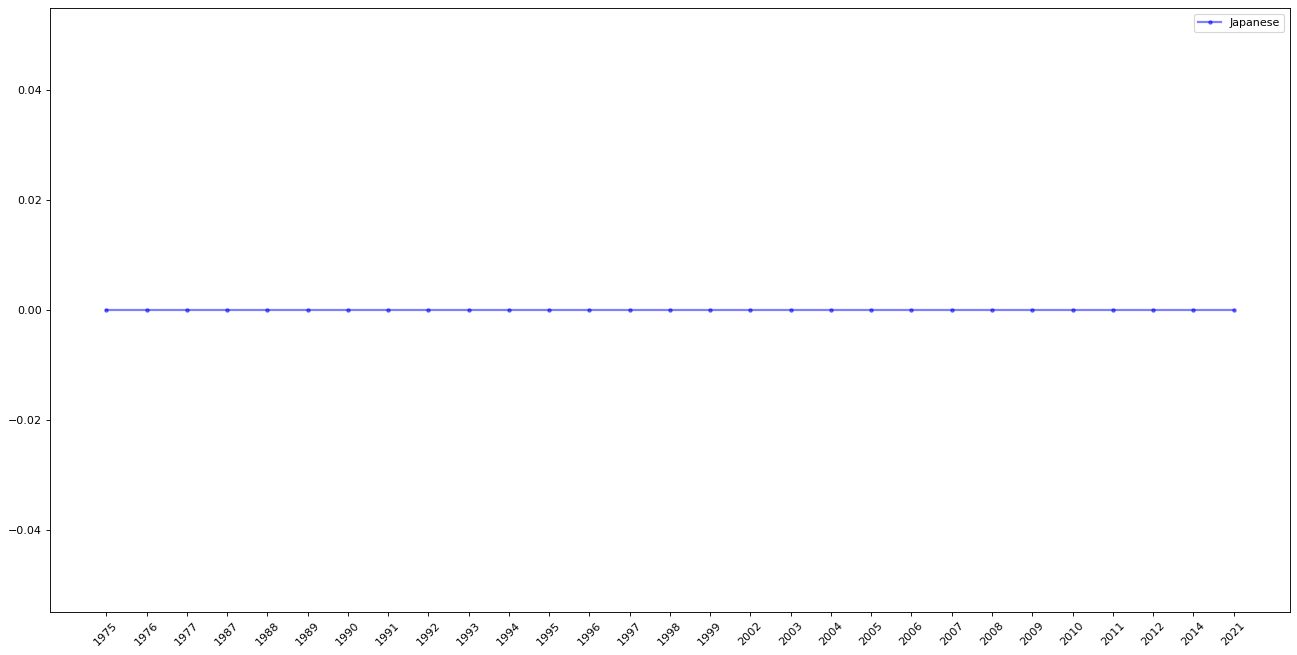

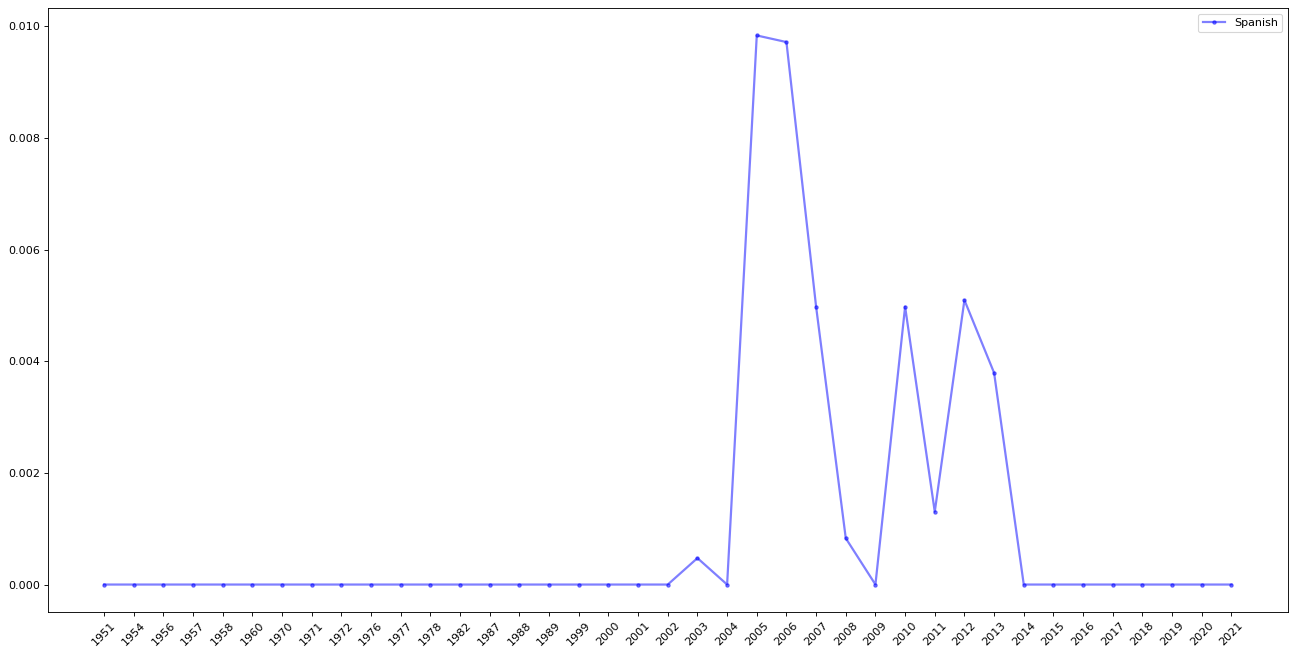

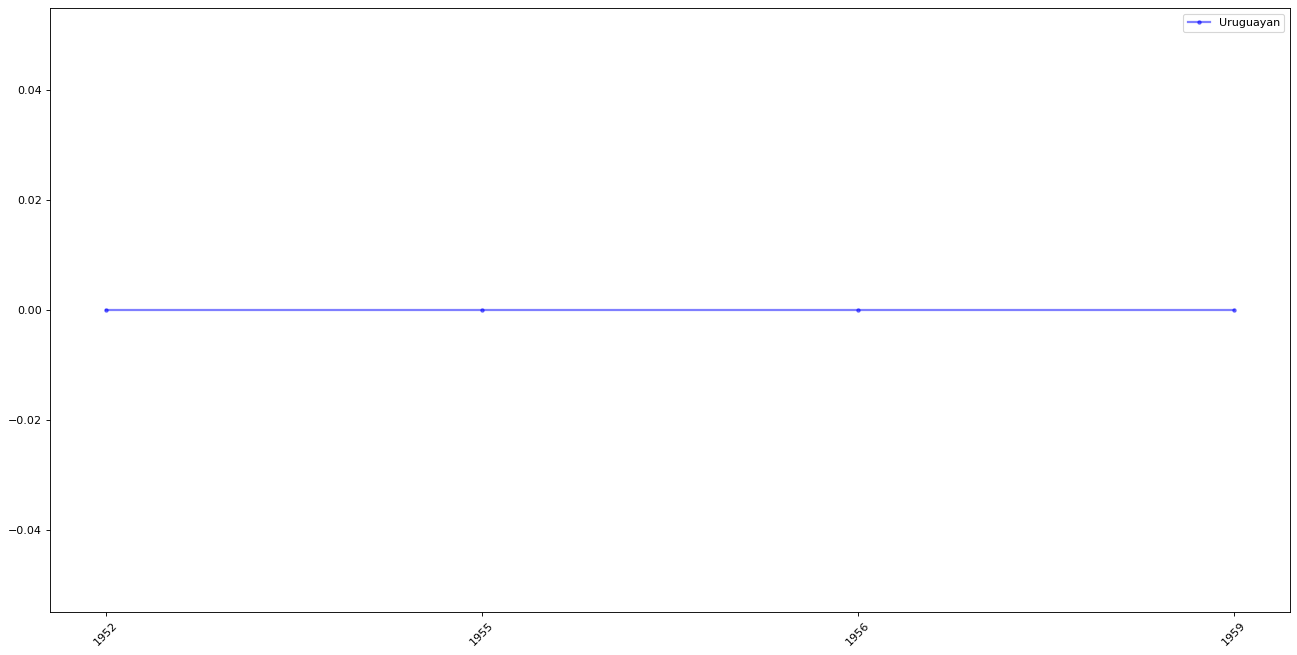

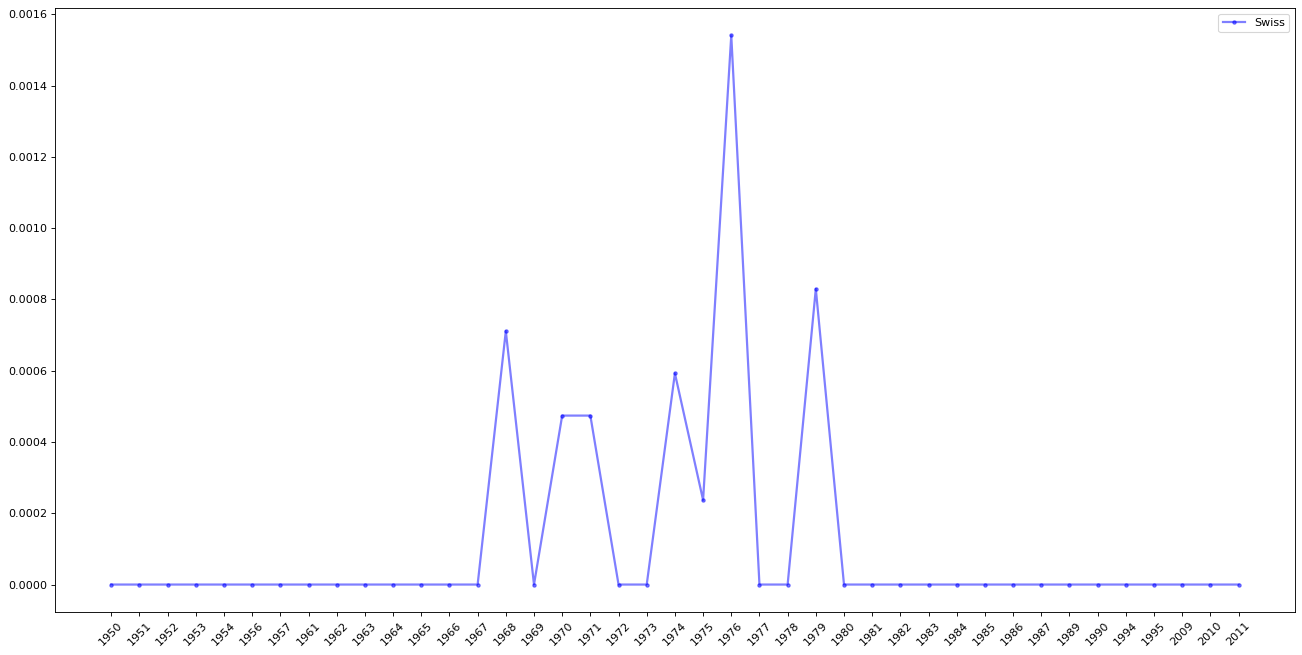

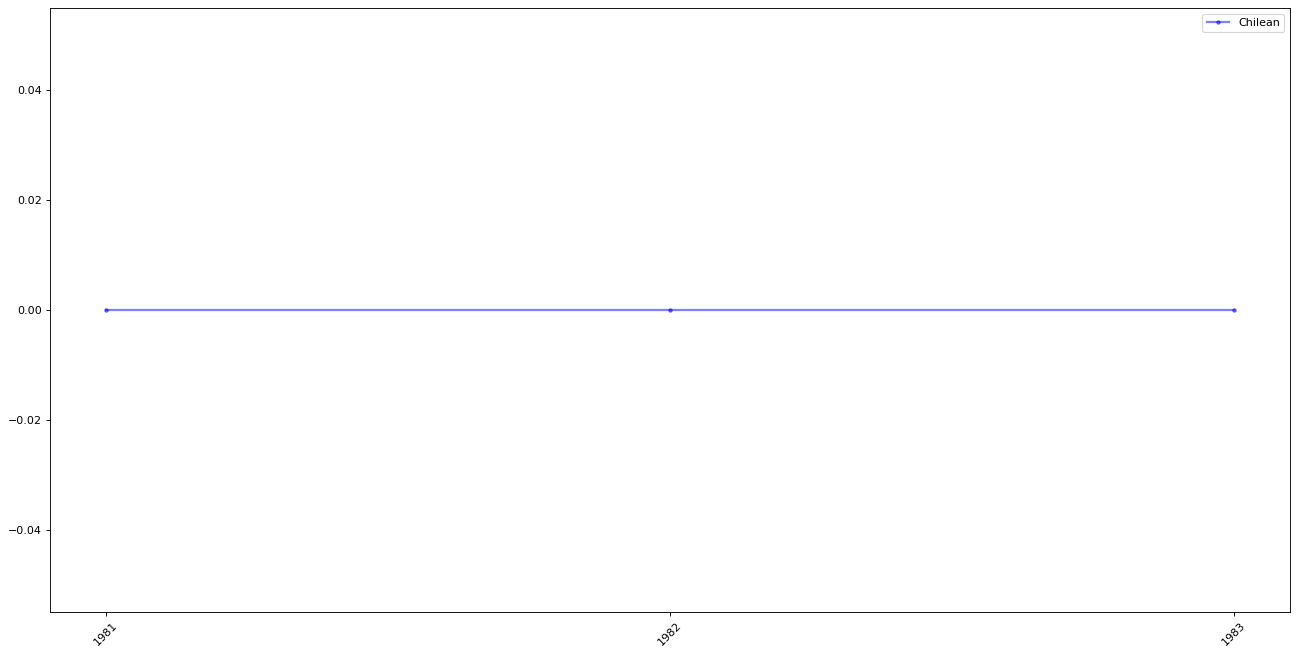

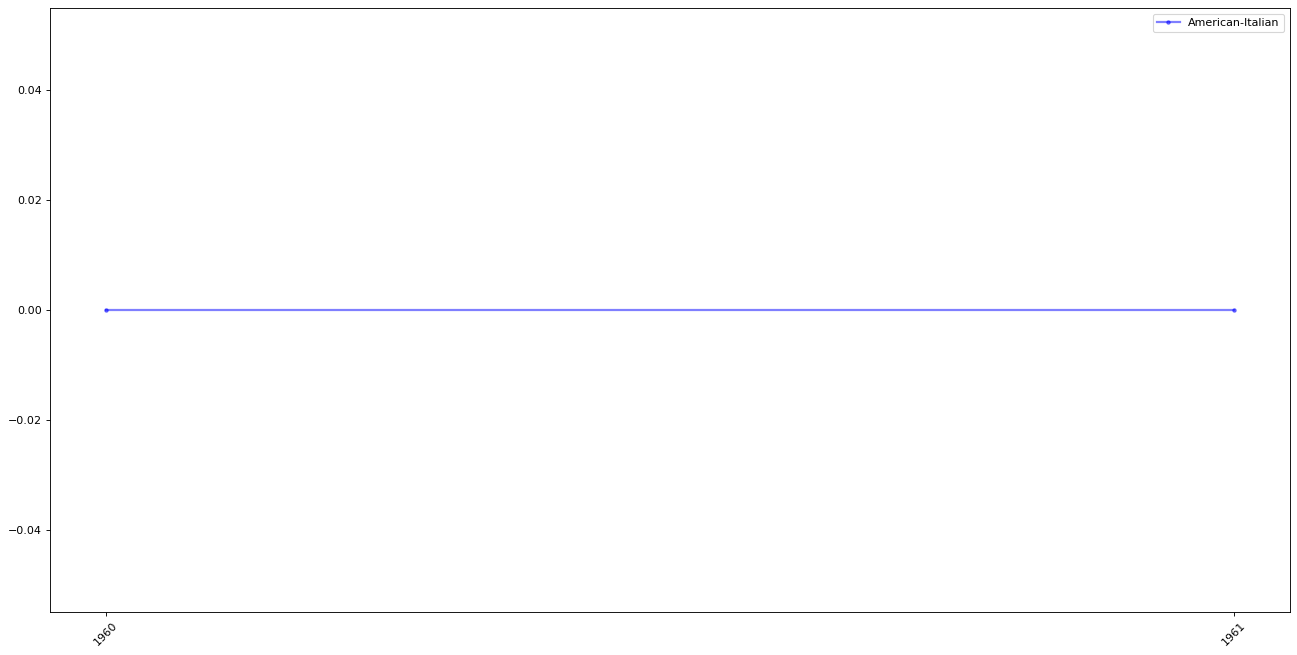

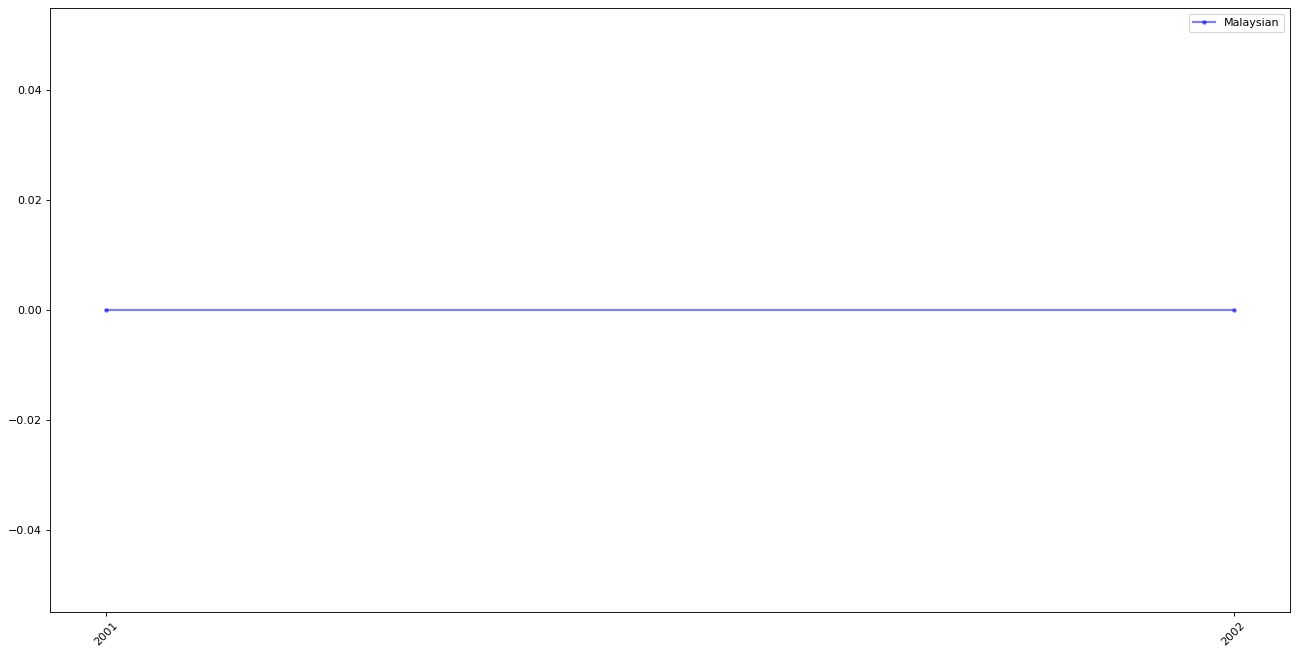

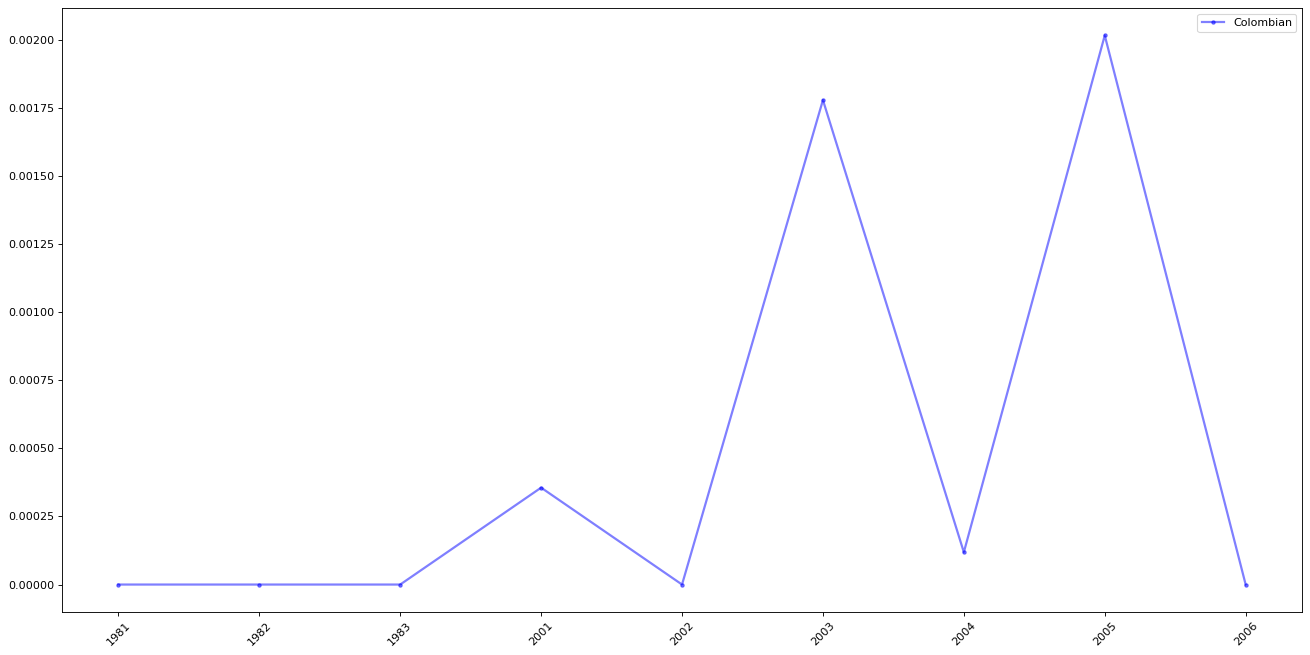

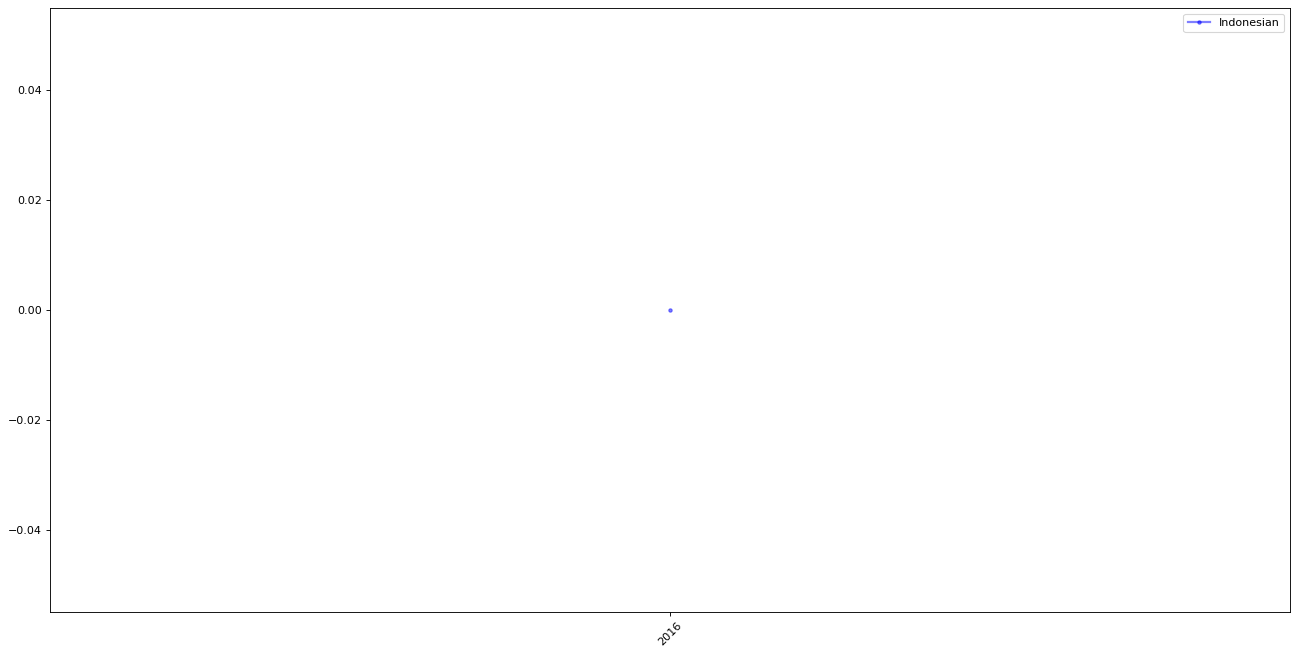

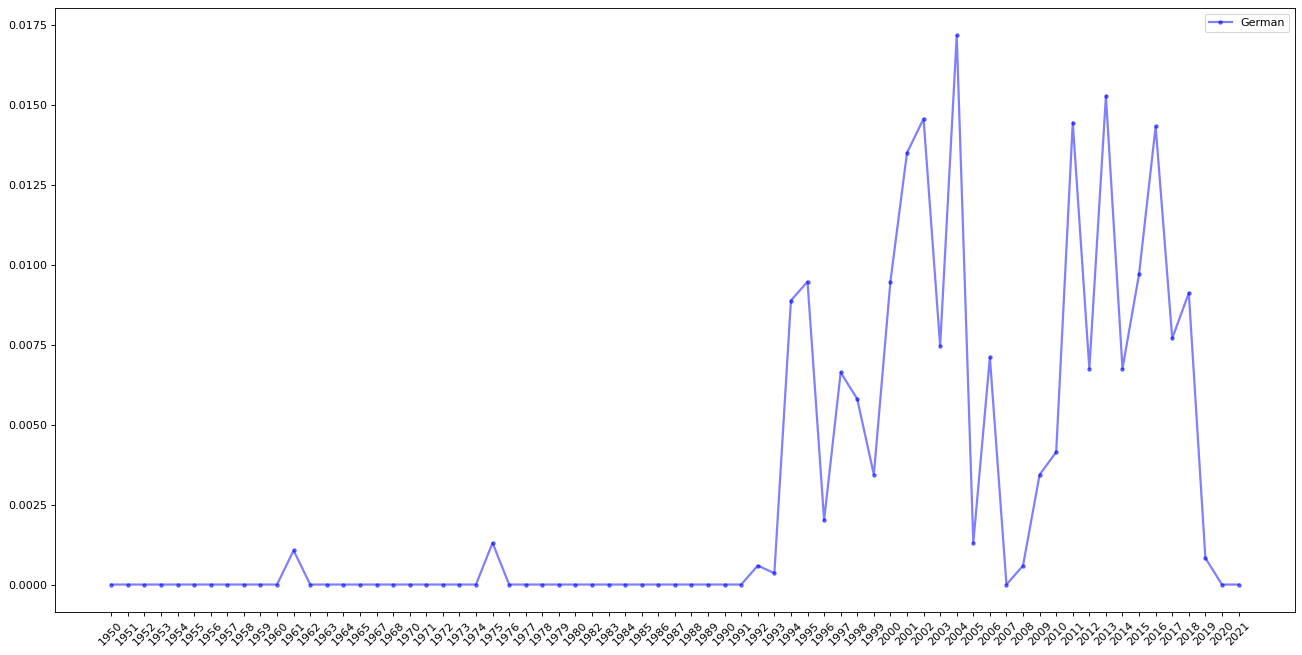

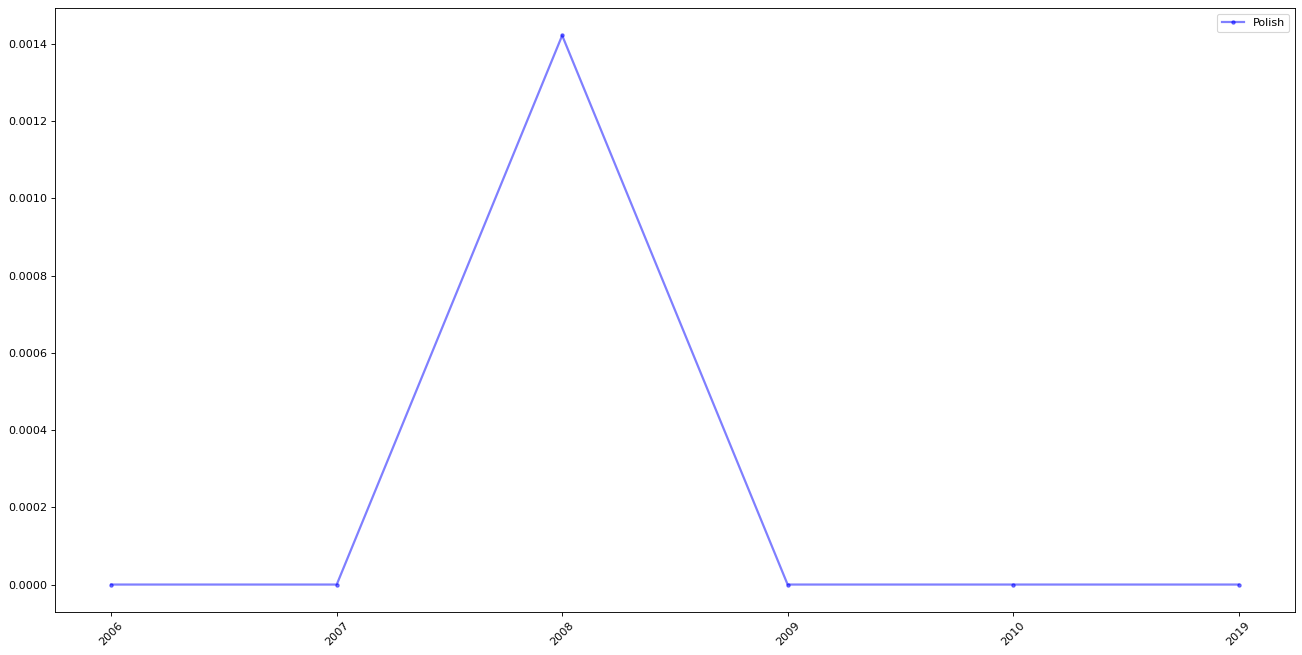

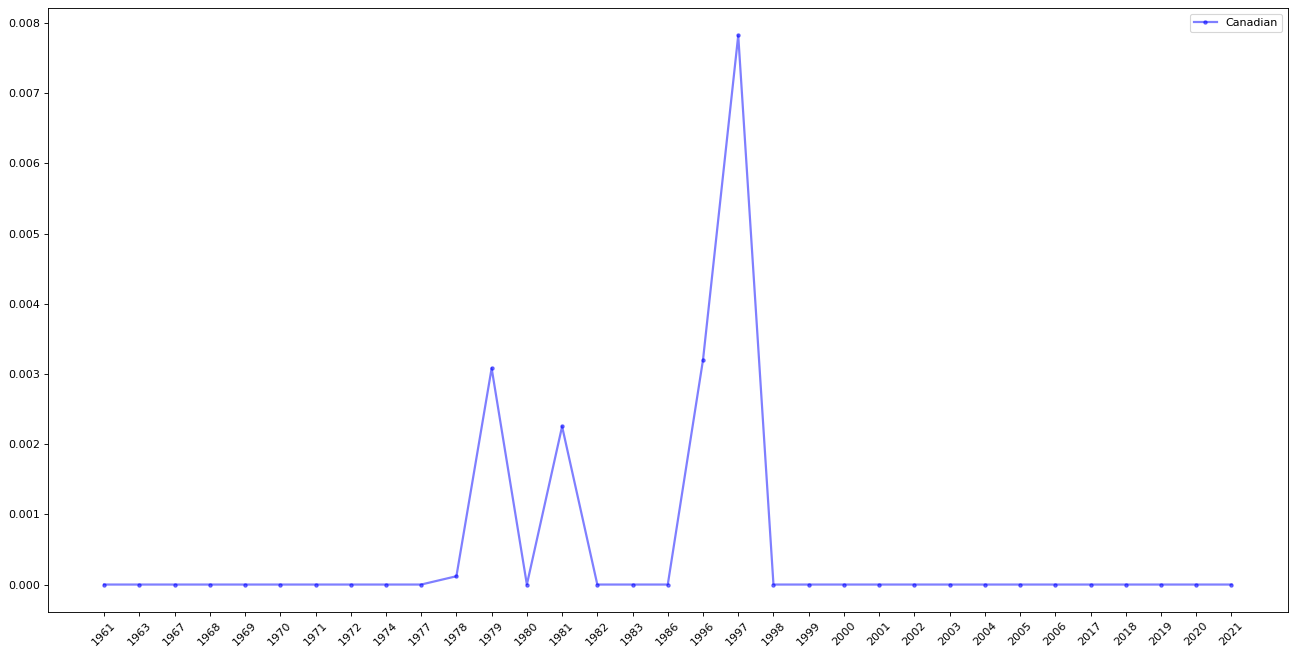

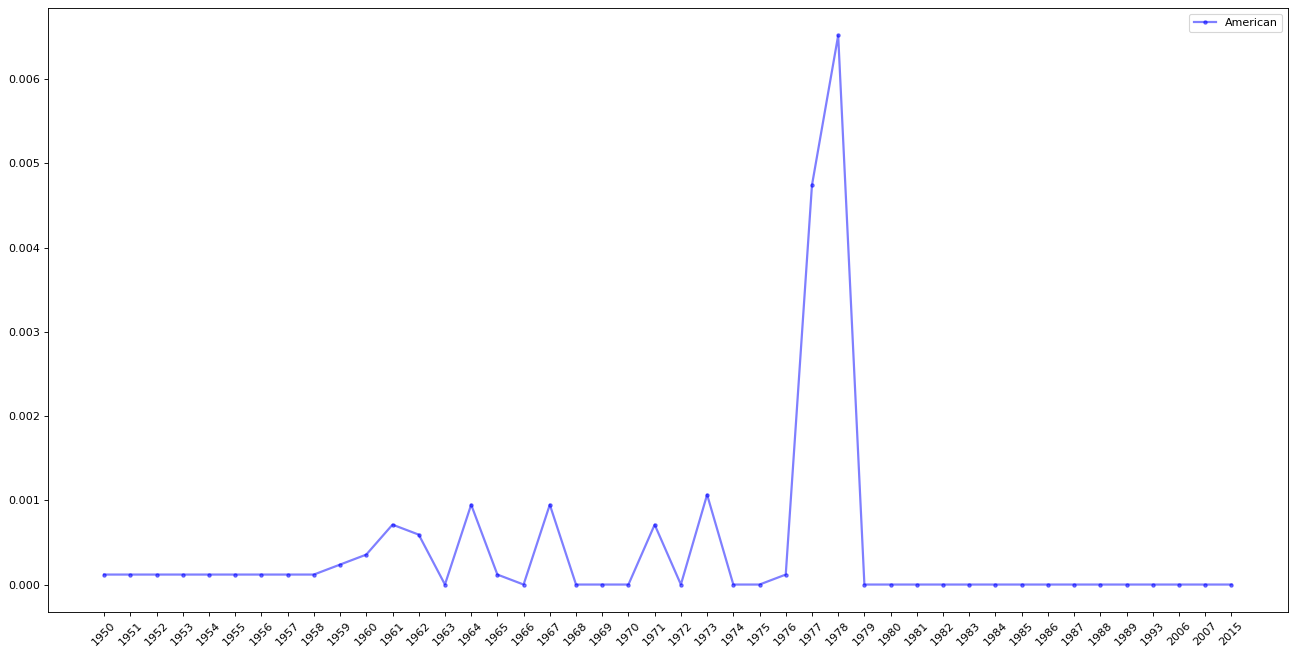

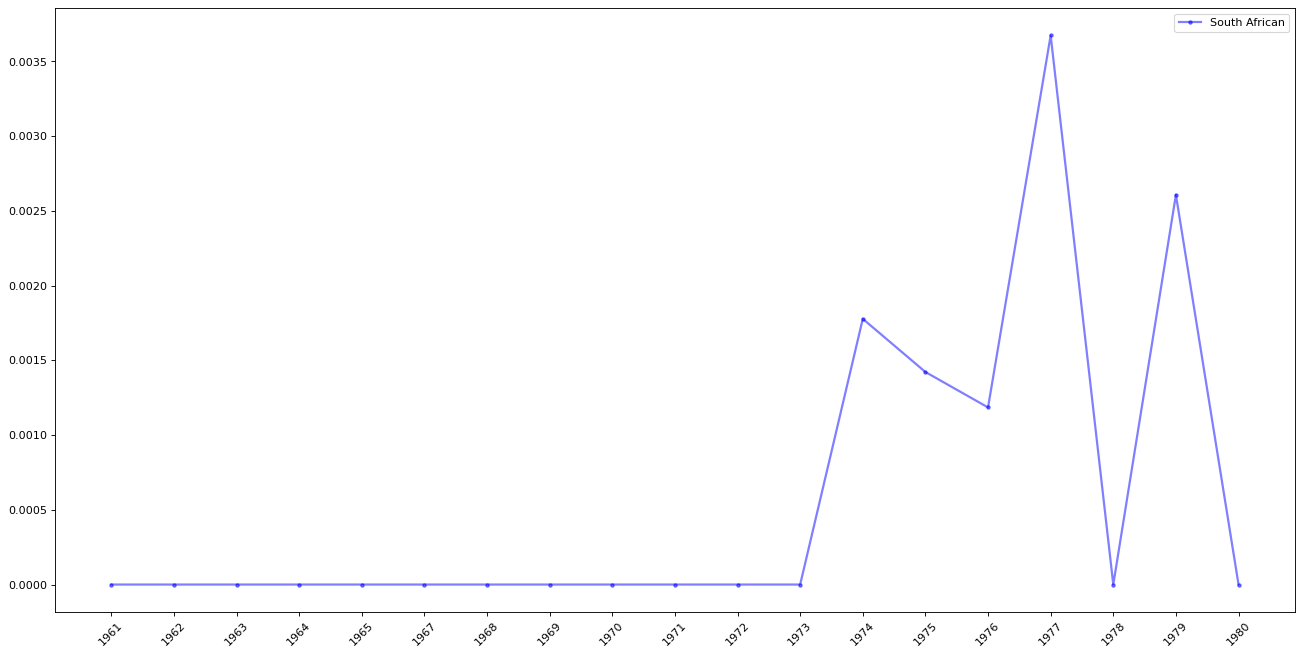

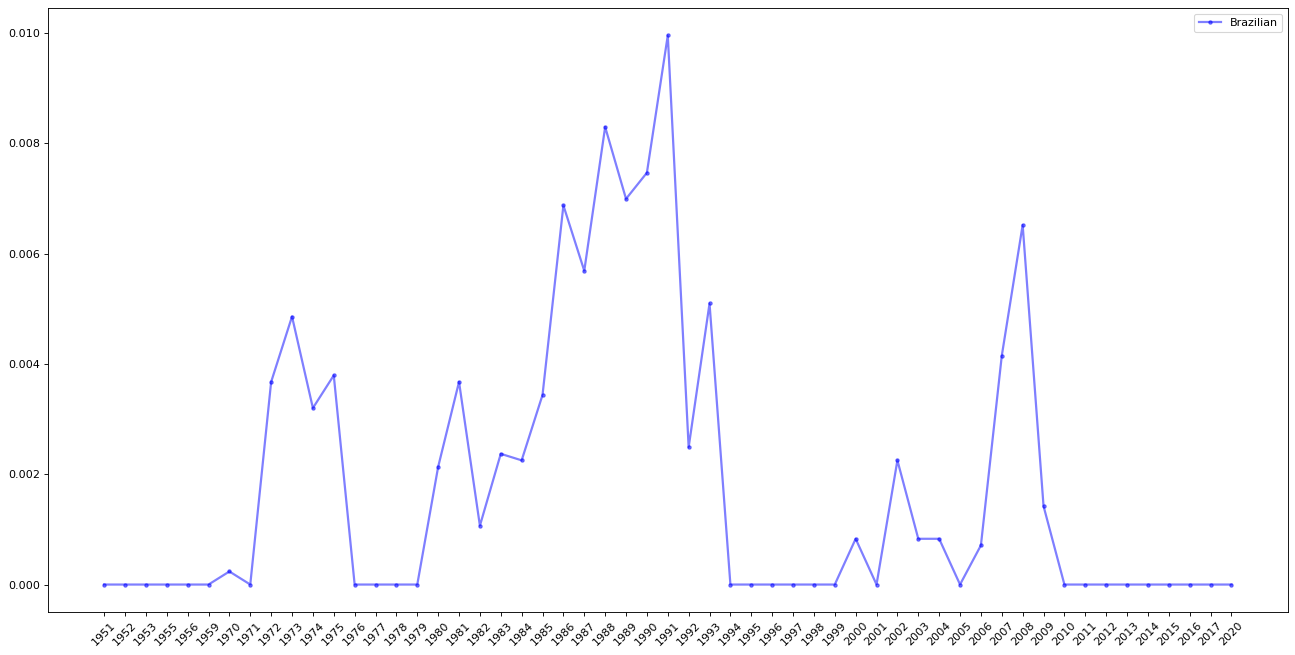

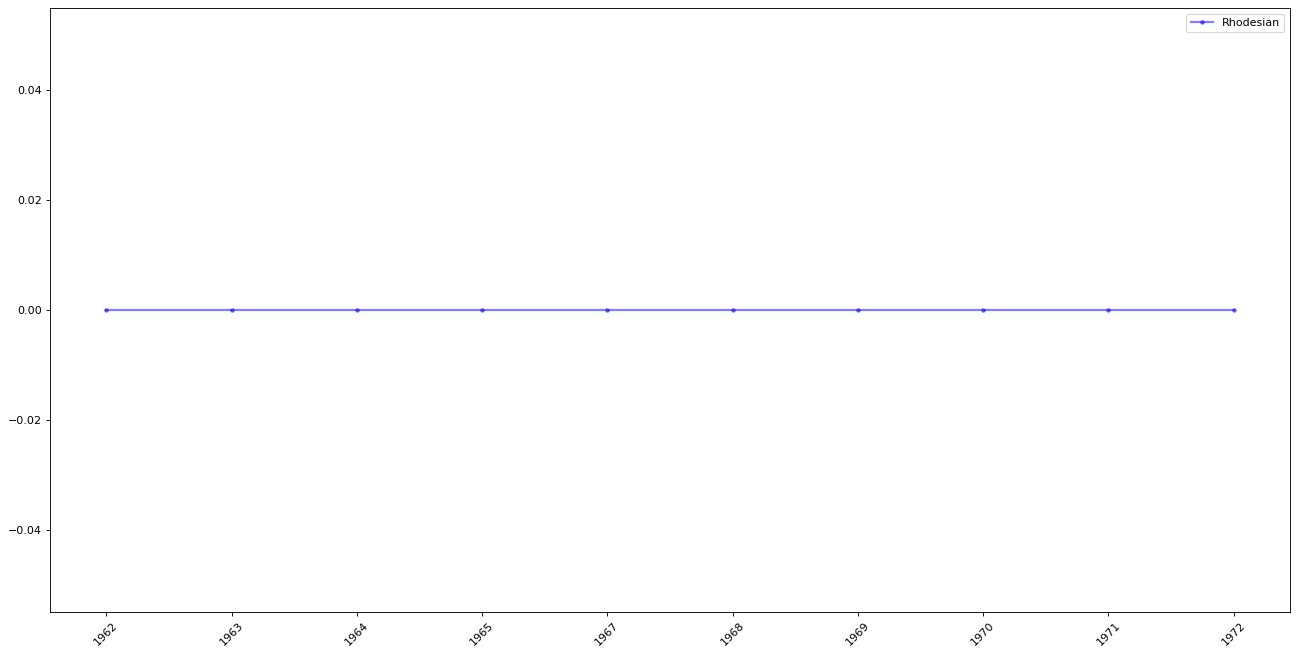

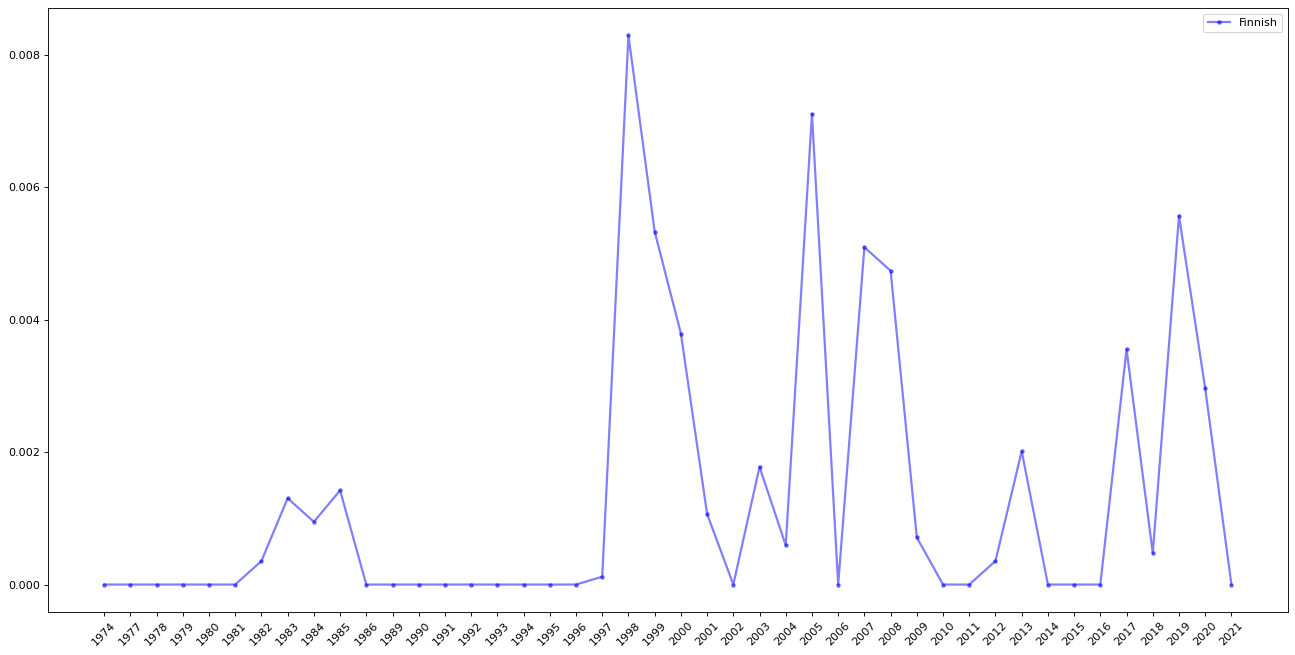

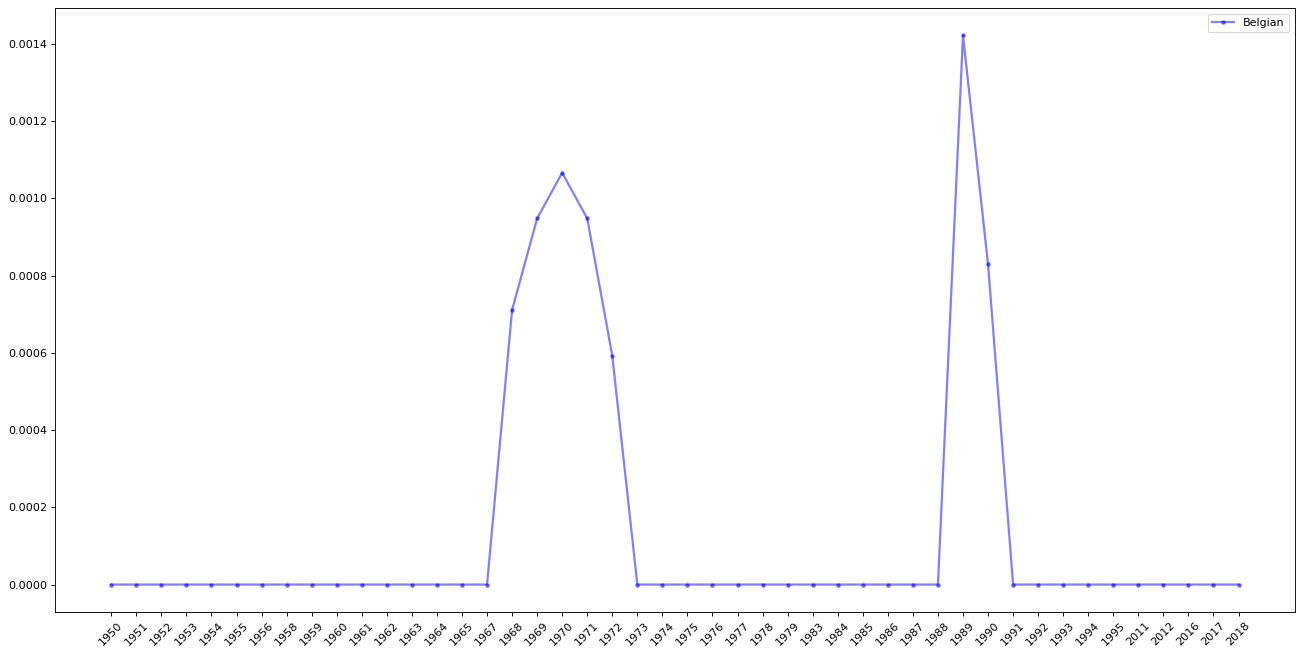

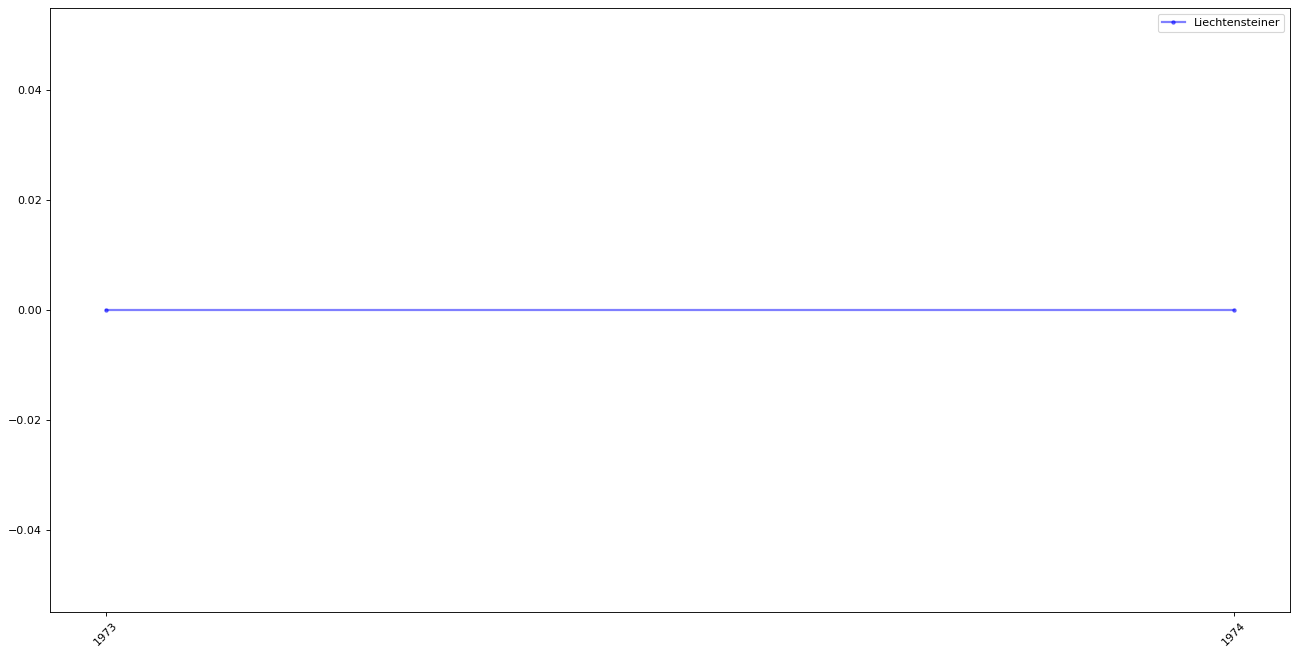

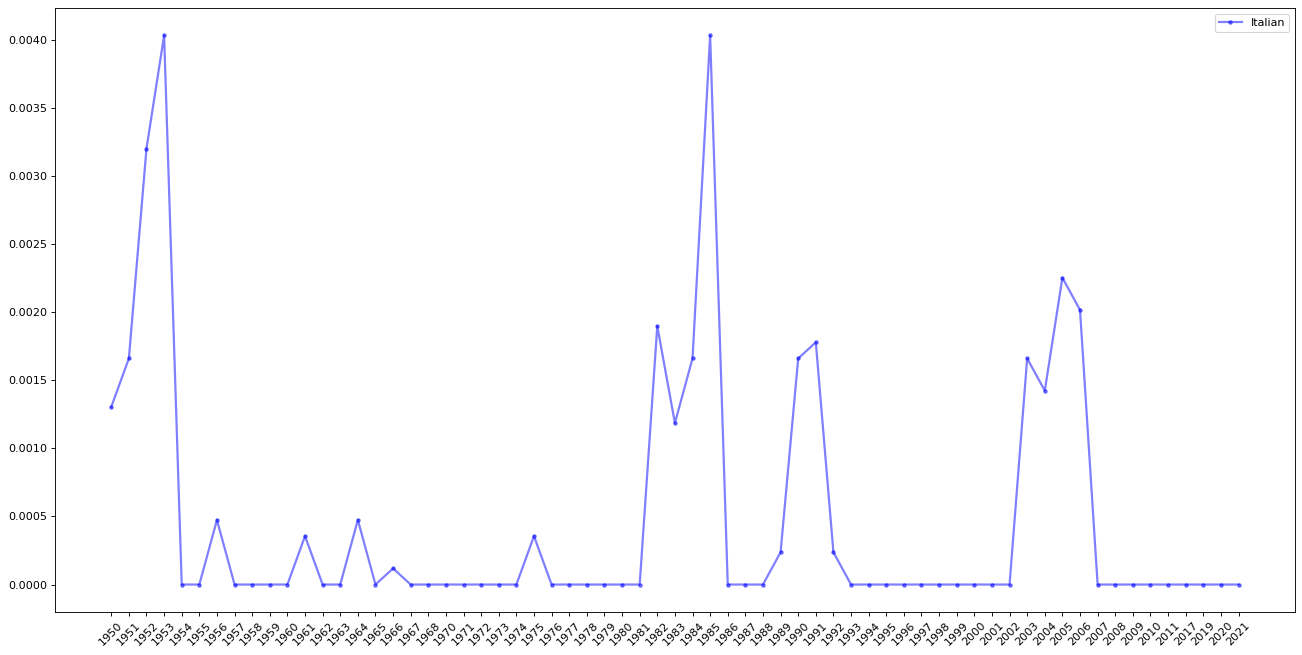

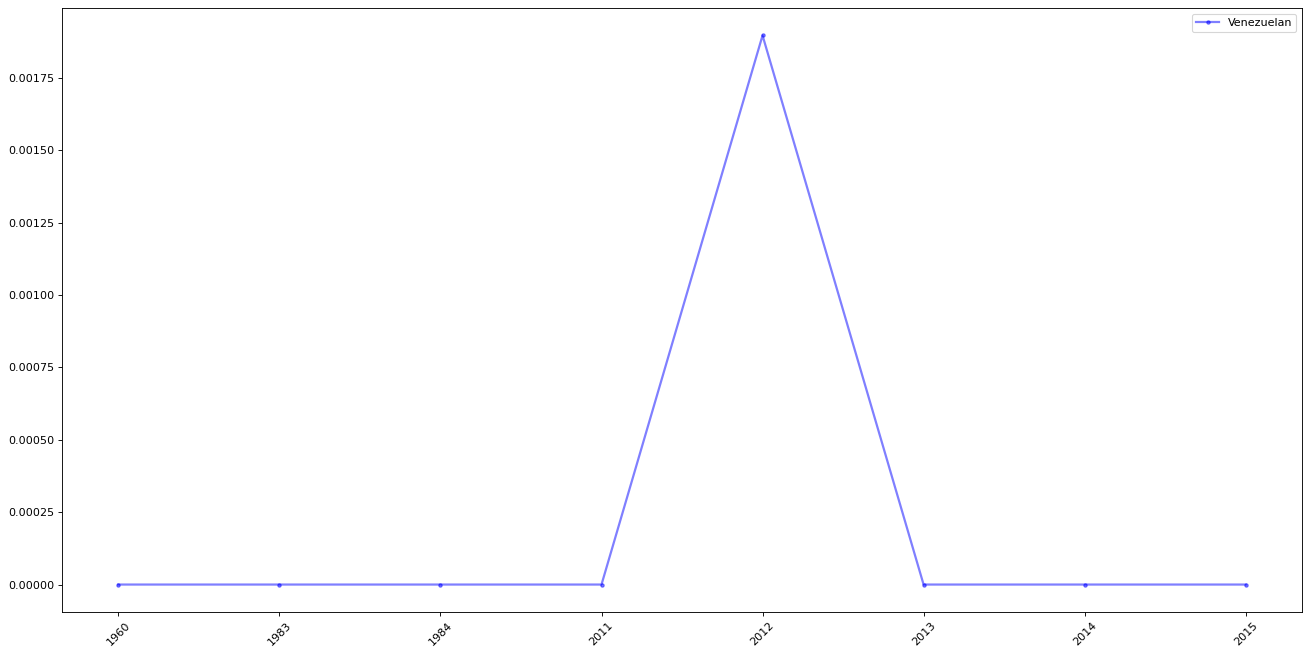

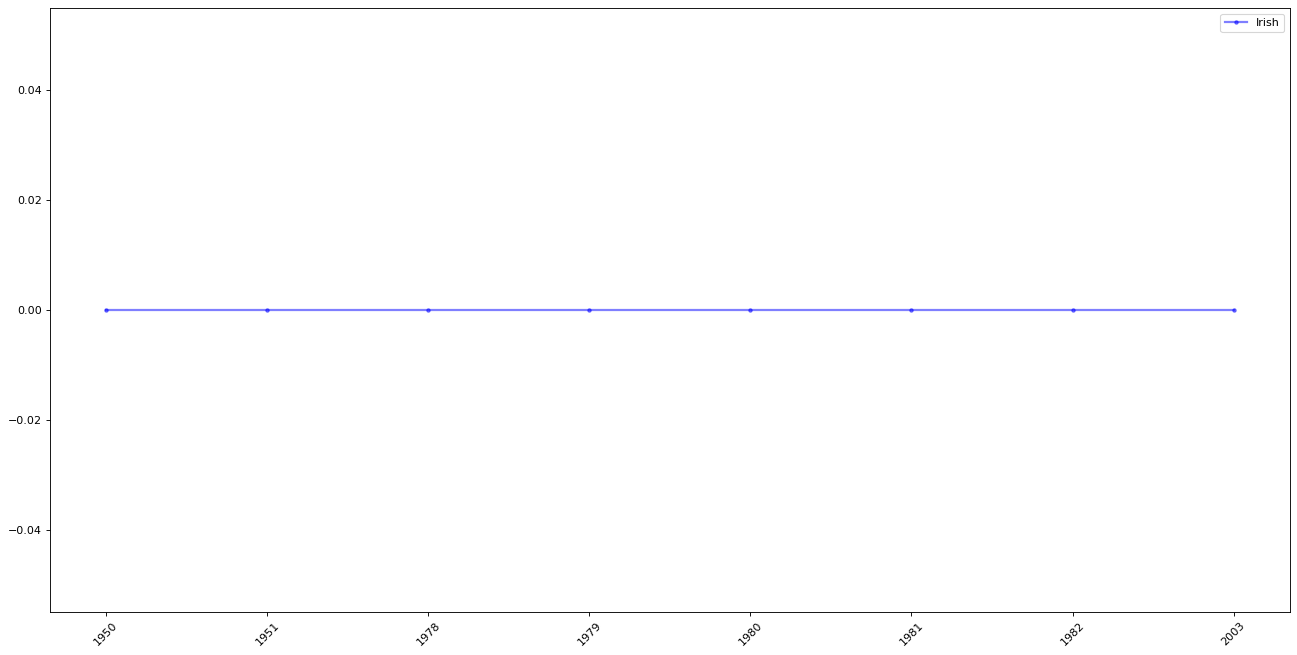

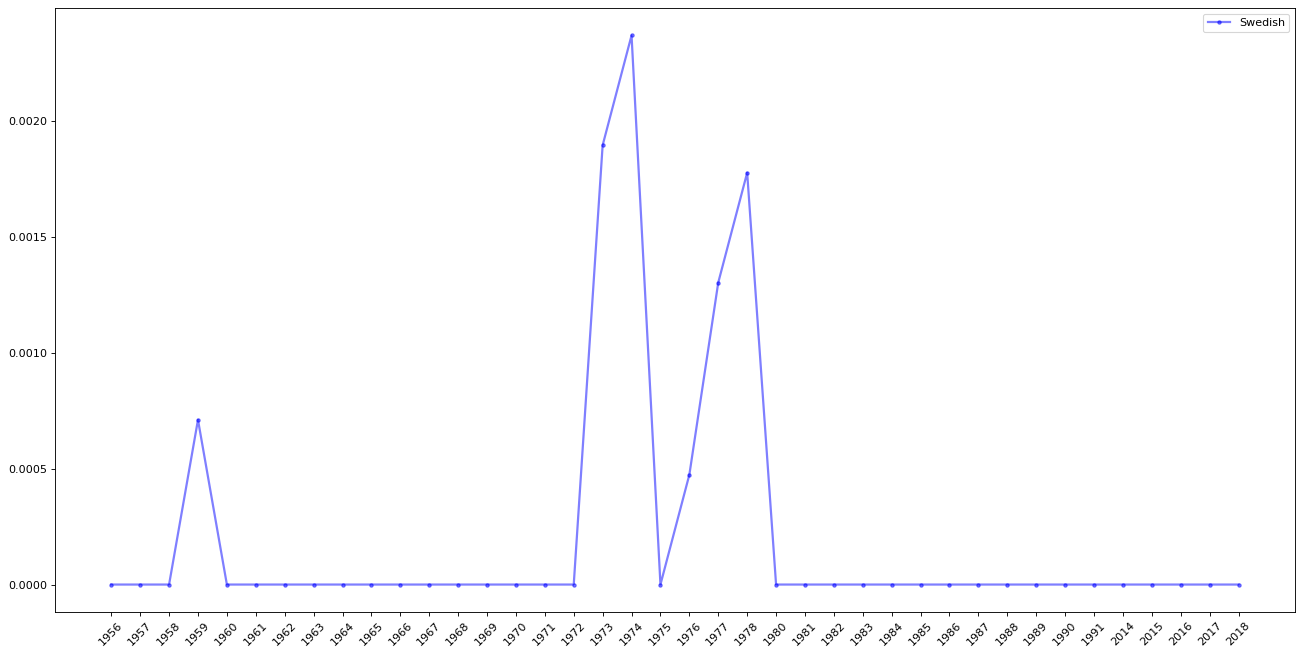

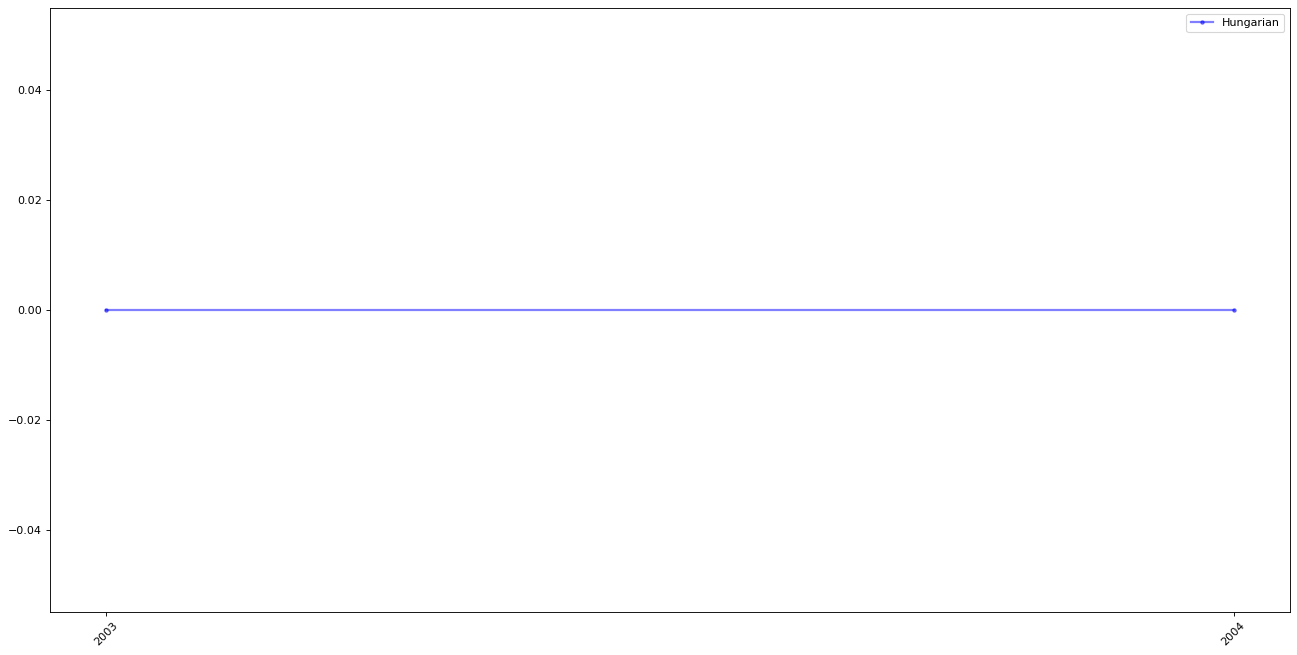

In [31]:
import matplotlib.pyplot as plt
import numpy as np
y = np.arange(2004,2022)

for l in list4:
    year = []
    nationality = []
    win_ratio = []
    for i in l:
        year.append(str(i[0]))
        win_ratio.append(i[1])
        nationality.append(i[2])
    
    plt.figure(figsize=(20,10),dpi=80)
    plt.plot(year,win_ratio,color= 'blue',alpha = 0.5,linestyle='-',linewidth=2,marker='.',label ='{}'.format(list(set(nationality))[0]))

    plt.legend()
    plt.xticks(rotation=45)
#     plt.ylim(list(y)
    plt.show()


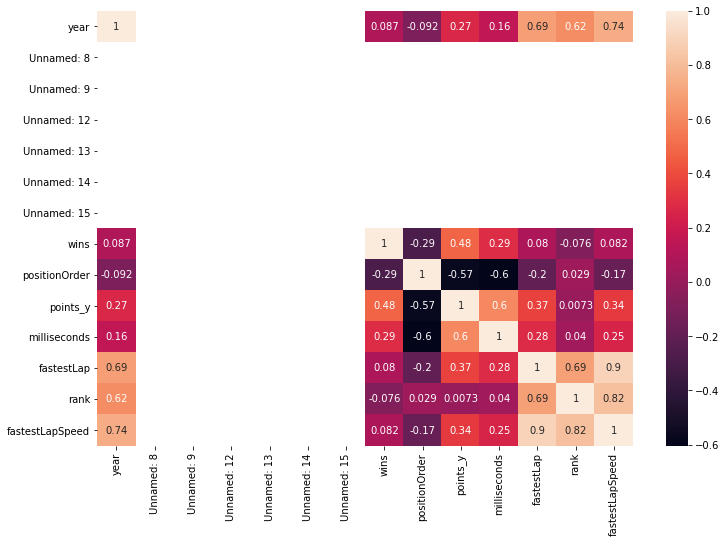

In [32]:
plt.figure(figsize = (12,8))
sns.heatmap (races_results.corr(method = 'pearson').drop(
    ['driverId','raceId','constructorId','grid','laps'],axis = 1).drop(
    ['driverId','raceId','constructorId','grid','laps'], axis = 0), annot = True)
plt.show()

In [33]:
qualifying1 = pd.read_csv('qualifying.csv')
qualifying1

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
8868,8909,1060,8,51,7,16,1:05.009,\N,\N
8869,8910,1060,839,214,31,17,1:05.051,\N,\N
8870,8911,1060,849,3,6,18,1:05.195,\N,\N
8871,8912,1060,854,210,47,19,1:05.427,\N,\N


In [34]:
qualifying = qualifying1.drop(['qualifyId','constructorId','number','position'],axis = 1)
qualifying 

,raceId,driverId,q1,q2,q3
0,18,1,1:26.572,1:25.187,1:26.714
1,18,9,1:26.103,1:25.315,1:26.869
2,18,5,1:25.664,1:25.452,1:27.079
3,18,13,1:25.994,1:25.691,1:27.178
4,18,2,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...
8868,1060,8,1:05.009,\N,\N
8869,1060,839,1:05.051,\N,\N
8870,1060,849,1:05.195,\N,\N
8871,1060,854,1:05.427,\N,\N


In [35]:
nation_qualifying = pd.merge(races_results, qualifying, how = 'inner', left_on = ['raceId','driverId'],right_on = ['raceId','driverId'])
nation_qualifying

,raceId,year,driverId,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed,q1,q2,q3
0,1,2009,2,German,NaN,NaN,NaN,NaN,NaN,NaN,...,10,0.0,58,5662869,48,5,216.245,1:25.827,1:25.504,\N
1,1,2009,3,German,NaN,NaN,NaN,NaN,NaN,NaN,...,6,3.0,58,5661506,48,1,217.668,1:25.846,1:25.123,1:26.973
2,1,2009,4,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,...,5,4.0,58,5660663,53,9,215.199,1:26.026,1:25.605,\N
3,1,2009,7,French,NaN,NaN,NaN,NaN,NaN,NaN,...,8,1.0,58,5662082,50,17,212.537,1:26.964,\N,\N
4,1,2009,8,Finnish,NaN,NaN,FP 练习赛,NaN,NaN,NaN,...,15,0.0,55,0,35,7,215.744,1:25.899,1:25.380,1:27.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,1060,2021,847,British,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0.0,70,0,56,16,225.613,1:04.907,1:04.553,1:04.591
8616,1060,2021,849,Canadian,NaN,NaN,NaN,NaN,NaN,NaN,...,16,0.0,70,0,62,11,226.865,1:05.195,\N,\N
8617,1060,2021,852,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,...,12,0.0,70,0,54,9,227.080,1:04.967,1:04.518,1:04.273
8618,1060,2021,853,Russian,NaN,NaN,NaN,NaN,NaN,NaN,...,19,0.0,69,0,49,19,222.842,1:05.951,\N,\N


In [36]:
nation_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 0 to 8619
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           8620 non-null   int64  
 1   year             8620 non-null   int64  
 2   driverId         8620 non-null   int64  
 3   nationality      8620 non-null   object 
 4   Unnamed: 8       0 non-null      float64
 5   Unnamed: 9       0 non-null      float64
 6   Unnamed: 10      1125 non-null   object 
 7   Unnamed: 11      500 non-null    object 
 8   Unnamed: 12      0 non-null      float64
 9   Unnamed: 13      0 non-null      float64
 10  Unnamed: 14      92 non-null     float64
 11  Unnamed: 15      92 non-null     float64
 12  wins             8620 non-null   int64  
 13  constructorId    8620 non-null   int64  
 14  grid             8620 non-null   int64  
 15  positionOrder    8620 non-null   int64  
 16  points_y         8620 non-null   float64
 17  laps          

In [37]:
def missing(x):
    if str(x) == '\\N':
        return 0

    else:
        return int(x)
    
nation_qualifying['milliseconds'] = nation_qualifying['milliseconds'].apply(missing)
nation_qualifying['fastestLap'] = nation_qualifying['fastestLap'].apply(missing)
nation_qualifying['rank'] = nation_qualifying['rank'].apply(missing)

In [38]:
def missing(x):
    if str(x) == '\\N':
        return 0
    else:
        return float(x)

nation_qualifying['fastestLapSpeed'] = nation_qualifying['fastestLapSpeed'].apply(missing)
nation_qualifying

,raceId,year,driverId,nationality,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed,q1,q2,q3
0,1,2009,2,German,NaN,NaN,NaN,NaN,NaN,NaN,...,10,0.0,58,5662869,48,5,216.245,1:25.827,1:25.504,\N
1,1,2009,3,German,NaN,NaN,NaN,NaN,NaN,NaN,...,6,3.0,58,5661506,48,1,217.668,1:25.846,1:25.123,1:26.973
2,1,2009,4,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,...,5,4.0,58,5660663,53,9,215.199,1:26.026,1:25.605,\N
3,1,2009,7,French,NaN,NaN,NaN,NaN,NaN,NaN,...,8,1.0,58,5662082,50,17,212.537,1:26.964,\N,\N
4,1,2009,8,Finnish,NaN,NaN,FP 练习赛,NaN,NaN,NaN,...,15,0.0,55,0,35,7,215.744,1:25.899,1:25.380,1:27.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,1060,2021,847,British,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0.0,70,0,56,16,225.613,1:04.907,1:04.553,1:04.591
8616,1060,2021,849,Canadian,NaN,NaN,NaN,NaN,NaN,NaN,...,16,0.0,70,0,62,11,226.865,1:05.195,\N,\N
8617,1060,2021,852,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,...,12,0.0,70,0,54,9,227.080,1:04.967,1:04.518,1:04.273
8618,1060,2021,853,Russian,NaN,NaN,NaN,NaN,NaN,NaN,...,19,0.0,69,0,49,19,222.842,1:05.951,\N,\N


In [39]:
nation_qualifying['fastestLaps'] = nation_qualifying['fastestLap'] / nation_qualifying['laps']
nation_qualifying['fastestLaps']

0       0.827586
1       0.827586
2       0.913793
3       0.862069
4       0.636364
          ...   
8615    0.800000
8616    0.885714
8617    0.771429
8618    0.710145
8619    0.811594
Name: fastestLaps, Length: 8620, dtype: float64

In [42]:
nationality_mean =nation_qualifying[['nationality','milliseconds']].groupby(['nationality']).mean()
nationality_mean

,milliseconds
nationality,
American,3.898328e+05
Argentine,0.000000e+00
Australian,3.491373e+06
Austrian,1.562279e+06
Belgian,7.503249e+05
Brazilian,2.456362e+06
British,2.985702e+06
Canadian,1.753604e+06
Colombian,3.198094e+06


In [44]:
nation_qualifying['wins_sumwin'] =  nation_qualifying['wins'] / wins_sum
nation_qualifying['wins_sumwin']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8615    0.0
8616    0.0
8617    0.0
8618    0.0
8619    0.0
Name: wins_sumwin, Length: 8620, dtype: float64

In [46]:
nation_qualifying['points_y_sum'] =  nation_qualifying['points_y'] / nation_qualifying.points_y.sum()
nation_qualifying['points_y_sum']

0       0.000000
1       0.000103
2       0.000137
3       0.000034
4       0.000000
          ...   
8615    0.000000
8616    0.000000
8617    0.000000
8618    0.000000
8619    0.000000
Name: points_y_sum, Length: 8620, dtype: float64

In [48]:
nation_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 0 to 8619
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           8620 non-null   int64  
 1   year             8620 non-null   int64  
 2   driverId         8620 non-null   int64  
 3   nationality      8620 non-null   object 
 4   Unnamed: 8       0 non-null      float64
 5   Unnamed: 9       0 non-null      float64
 6   Unnamed: 10      1125 non-null   object 
 7   Unnamed: 11      500 non-null    object 
 8   Unnamed: 12      0 non-null      float64
 9   Unnamed: 13      0 non-null      float64
 10  Unnamed: 14      92 non-null     float64
 11  Unnamed: 15      92 non-null     float64
 12  wins             8620 non-null   int64  
 13  constructorId    8620 non-null   int64  
 14  grid             8620 non-null   int64  
 15  positionOrder    8620 non-null   int64  
 16  points_y         8620 non-null   float64
 17  laps          

In [53]:
df10 =  nation_qualifying[['nationality','fastestLapSpeed','fastestLaps','wins_sumwin','points_y_sum']]
df10 = df10.groupby(['nationality']).mean()
df10['milliseconds'] = nationality_mean
df10['fastestLaps'] = df10['fastestLaps'].fillna(value=0)


,fastestLapSpeed,fastestLaps,wins_sumwin,points_y_sum,milliseconds
nationality,,,,,
American,177.844406,0.809391,0.000000,0.000000,3.898328e+05
Argentine,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Australian,182.584456,0.739162,0.000049,0.000186,3.491373e+06
Austrian,98.552870,0.328301,0.000007,0.000035,1.562279e+06
Belgian,166.880521,0.731006,0.000000,0.000013,7.503249e+05
Brazilian,146.807632,0.000000,0.000021,0.000081,2.456362e+06
British,139.972522,0.547425,0.000127,0.000177,2.985702e+06
Canadian,152.974995,0.597754,0.000017,0.000047,1.753604e+06
Colombian,138.716109,0.419634,0.000063,0.000126,3.198094e+06


In [83]:
import matplotlib.pyplot as plt
import pyecharts.options as opts
from pyecharts.charts import Radar
def create_radar(i):
    c = (
        #创建雷达图，对雷达图进行设置大小和主题
        Radar(init_opts=opts.InitOpts(width="600px", height="500px", bg_color="#CCCCCC"))
        .add_schema(
            schema=[
                #雷达每个角对应的内容，和范围
                opts.RadarIndicatorItem(name="fastestLapSpeed", max_=220),
                opts.RadarIndicatorItem(name="fastestLaps", max_=1),
                opts.RadarIndicatorItem(name="wins_sumwin", max_=0.0001),
                opts.RadarIndicatorItem(name="points_sum", max_=0.0002),
                opts.RadarIndicatorItem(name="milliseconds_mean", max_=8000000),
            ],
            #雷达图的文字和颜色选择
            splitarea_opt=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
            textstyle_opts=opts.TextStyleOpts(color="#fff"),
        )
        #一个add对应一条雷达线
        .add(
            series_name="{}".format(list(df10.index)[i]),
            data=[[list(df10.values)[i][0],list(df10.values)[i][1],list(df10.values)[i][2],list(df10.values)[i][3],list(df10.values)[i][4]]],
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#DA4B1E"),
        )
        #设置雷达图的标题的大小和颜色以及位置
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="",pos_left="20%", pos_top="40%"), legend_opts=opts.LegendOpts()
        )
    )
    return c


# for i in range(len(list(df10['fastestLaps'].index))):
c = create_radar(5)
c.render_notebook()


In [33]:
def time_change(x):
    if str(x) == '\\N':
        return 0
    if x is np.nan:
        return 0
    else:
        x = str(x)
        x = x.split(':')
        x1 = int(x[0]) * 3600000
        x2 = int(str(x[-1]).split('.')[0]) * 60000
        x3 = int(str(x[-1]).split('.')[-1]) * 1000
        x4 = int(x1+x2+x3)
        return x4


nation_qualifying['q1'] = nation_qualifying['q1'].apply(time_change)
nation_qualifying['q2'] = nation_qualifying['q2'].apply(time_change)
nation_qualifying['q3'] = nation_qualifying['q3'].apply(time_change)

nation_qualifying.head(50)

,raceId,year,driverId,nationality,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed,q1,q2,q3
0,1,2009,2,German,0,2,9,10,0.0,58,5662869,48,5,216.245,5927000,5604000,0
1,1,2009,3,German,0,3,5,6,3.0,58,5661506,48,1,217.668,5946000,5223000,6133000
2,1,2009,4,Spanish,0,4,10,5,4.0,58,5660663,53,9,215.199,5186000,5705000,0
3,1,2009,7,French,0,5,17,8,1.0,58,5662082,50,17,212.537,6124000,0,0
4,1,2009,8,Finnish,0,6,7,15,0.0,55,0,35,7,215.744,5999000,5480000,5383000
5,1,2009,9,Polish,0,2,4,14,0.0,55,0,36,2,216.970,6022000,5252000,6074000
6,1,2009,10,German,0,7,19,4,5.0,58,5660219,53,6,215.920,5599000,5381000,6135000
7,1,2009,15,Italian,0,7,20,3,6.0,58,5657388,50,10,214.706,5354000,5365000,5347000
8,1,2009,16,German,0,10,16,9,0.0,58,5662119,43,11,214.640,5902000,0,0
9,1,2009,17,Australian,0,9,8,12,0.0,57,0,38,8,215.695,5527000,5341000,5466000


In [46]:
nationfinal = nation_qualifying.drop(['q1','q2','q3'],axis = 1)
nationfinal.head(50)

,raceId,year,driverId,nationality,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,1,2009,2,German,0,2,9,10,0.0,58,5662869,48,5,216.245
1,1,2009,3,German,0,3,5,6,3.0,58,5661506,48,1,217.668
2,1,2009,4,Spanish,0,4,10,5,4.0,58,5660663,53,9,215.199
3,1,2009,7,French,0,5,17,8,1.0,58,5662082,50,17,212.537
4,1,2009,8,Finnish,0,6,7,15,0.0,55,0,35,7,215.744
5,1,2009,9,Polish,0,2,4,14,0.0,55,0,36,2,216.970
6,1,2009,10,German,0,7,19,4,5.0,58,5660219,53,6,215.920
7,1,2009,15,Italian,0,7,20,3,6.0,58,5657388,50,10,214.706
8,1,2009,16,German,0,10,16,9,0.0,58,5662119,43,11,214.640
9,1,2009,17,Australian,0,9,8,12,0.0,57,0,38,8,215.695


In [35]:
df1 = nation_qualifying[['nationality','driverId','q1','q2','q3','fastestLap','fastestLapSpeed','milliseconds']]

In [36]:
nationality = []
driverId = []
df2 = df1.groupby(['nationality','driverId']).mean()
for i in df2.index:
    nationality.append(i[0])
    driverId.append(i[1])
df2['nationality'] = nationality
df2['driverId'] = driverId


In [37]:
q1 = df2.q1.to_list()
q2 = df2.q2.to_list()
q3 = df2.q3.to_list()
fastestLap = df2.fastestLap.to_list()
fastestLapSpeed = df2.fastestLapSpeed.to_list()
milliseconds = df2.milliseconds.to_list()
nationality = df2.nationality.to_list()
driverId = df2.driverId.to_list()

In [38]:
def data2(n):
    sum_list = []
    driverId_list = []
    for i in range(len(nationality)):
        if str(nationality[i]) in 'British':
            driverId_list.append(driverId[i])
            sum_list.append([q1[i],q2[i],q3[i],fastestLap[i],fastestLapSpeed[i],milliseconds[i]])
    return sum_list,driverId_list

In [39]:
sum_list,driverId_list = data2('British')
driverId_list

[1,
 14,
 18,
 19,
 51,
 56,
 65,
 66,
 71,
 84,
 87,
 95,
 814,
 820,
 829,
 835,
 846,
 847,
 851]

In [40]:
import pyecharts.options as opts
from pyecharts.charts import Radar

#创建雷达图需要的数据集
values1 = [sum_list[0]]
values2 = [sum_list[1]]
values3 = [sum_list[2]]
values4 = [sum_list[3]]
values5 = [sum_list[4]]
values6 = [sum_list[5]]
values7 = [sum_list[6]]
values8 = [sum_list[7]]
values9 = [sum_list[8]]
values10 = [sum_list[9]]
values11 = [sum_list[10]]
values12 = [sum_list[11]]
values13 = [sum_list[12]]
values14 = [sum_list[13]]
values15 = [sum_list[14]]
values16 = [sum_list[15]]
values17 = [sum_list[16]]
values18 = [sum_list[17]]
values19 = [sum_list[18]]

In [41]:
c = (
    #创建雷达图，对雷达图进行设置大小和主题
    Radar(init_opts=opts.InitOpts(width="600px", height="500px", bg_color="#CCCCCC"))
    .add_schema(
        schema=[
            #雷达每个角对应的内容，和范围
            opts.RadarIndicatorItem(name="q1", max_=10000000),
            opts.RadarIndicatorItem(name="q2", max_=10000000),
            opts.RadarIndicatorItem(name="q3", max_=10000000),
            opts.RadarIndicatorItem(name="fastestLap", max_=100),
            opts.RadarIndicatorItem(name="fastestLapSpeed", max_=1000),
            opts.RadarIndicatorItem(name="milliseconds", max_=6000000),
        ],
        #雷达图的文字和颜色选择
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#fff"),
    )
    #一个add对应一条雷达线
    .add(
        series_name="driverId=1",
        data=values1,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
        linestyle_opts=opts.LineStyleOpts(color="#DA4B1E"),
    )
    .add(
        series_name="driverId=14",
        data=values2,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
        linestyle_opts=opts.LineStyleOpts(color="#D5DA1E"),
    )
    .add(
            series_name="driverId=18",
            data=values3,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#41DA1E"),
        )
    .add(
            series_name="driverId=19",
            data=values4,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#158847"),
        )
    .add(
            series_name="driverId=51",
            data=values5,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#13DADB"),
        )
     .add(
            series_name="driverId=56",
            data=values6,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#FFEBCD"),
        )
     .add(
            series_name="driverId=65",
            data=values7,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#5F9EA0"),
        )
     .add(
            series_name="driverId=66",
            data=values8,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#DC143C"),
        )
     .add(
            series_name="driverId=71",
            data=values9,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#00008B"),
        )
     .add(
            series_name="driverId=84",
            data=values10,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#FF8C00"),
        )
     .add(
            series_name="driverId=87",
            data=values11,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#8B0000"),
        )
     .add(
            series_name="driverId=95",
            data=values12,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#2F4F4F"),
        )
     .add(
            series_name="driverId=814",
            data=values13,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#1E90FF"),
        )
     .add(
            series_name="driverId=820",
            data=values14,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#008000"),
        )
     .add(
            series_name="driverId=829",
            data=values15,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#87CEFA"),
        )
     .add(
            series_name="driverId=835",
            data=values16,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color='#FAF0E6'),
        )
     .add(
            series_name="driverId=846",
            data=values17,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#F5FFFA"),
        )
     .add(
            series_name="driverId=847",
            data=values18,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#DA70D6"),
        )
     .add(
            series_name="driverId=851",
            data=values19,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#FF6347"),
        )
    #设置雷达图的标题的大小和颜色以及位置
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="",pos_left="20%", pos_top="40%"), legend_opts=opts.LegendOpts()
    )
)
c.render_notebook()

In [42]:
type(nation_qualifying)

pandas.core.frame.DataFrame

In [43]:
def win(x):
    print(x)
    if x == 0:
        return 0
    else: 
        return 1
    
nation_qualifying['wins'] = nation_qualifying['wins'].apply(win)

0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
6
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
6
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
6
2
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
6
2
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
6
2
0
2
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
1
6
2
0
2
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
1
6
3
0
2
0
0
0
0
2
0
0
0
0
0
1
0
0
0
2
6
3
0
2
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
2
6
4
0
2
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
2
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
2
0
0
0
2
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
2
1
0
0
2
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
2
1
0
0
3
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
2
1
0
0
3
0
0
0
0
0


1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
2
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
2
0
0
0
0
2
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
3
0
0
0
0
2
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
1
3
0
0
0
0
2
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
1
3
0
0
0
0
2
2
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
3
1
3
0
0
0
0
2
2
1
0
0
0
0
0
0
1
0
0
0
0
0
0
3
1
3
0
0
0
0
2
2
2
0
0
0
0
0
0
0
0
1
0
0
0
0
0
3
1
3
0
0
0
0
2
2
3
0
0
0
0
0
0
0
0
1
0
0
0
0
0
3
1
3
0
0
0
0
2
2
4
0
0
0
0
0
0
0
1
0
0
0
0
0
3
1
3
0
0
0
0
2
2
5
0
0
0
0
0
0
0
0
1
0
0
0
0
0
3
1
3
0
1
0
0
2
2
5
0
0
0
0
0
0
0
0
1
0
0
0
0
0
4
1
3
0
1
0
0
2
2
5
0
0
0
0
0
0
0
0
1
0
0
0
0
0
4
1
3
0
1
0
0
2
3
5
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
0
0
0
0
2
0


In [44]:
constructor = nation_qualifying[['driverId','constructorId','wins']].groupby(['driverId','constructorId']).sum()
constructor

wins
driverId constructorId      
1        1                82
         131             144
2        2                 0
         3                 0
         4                 0
...                      ...
850      210               0
851      3                 0
852      213               0
853      210               0
854      210               0

[362 rows x 1 columns]

In [45]:
driver = nation_qualifying[['constructorId','driverId','wins']].groupby(['constructorId','driverId']).sum()
driver

wins
constructorId driverId      
1             1           82
              4           16
              5            8
              8           35
              14          34
...                      ...
213           826          0
              842         10
              852          0
214           4            0
              839          0

[362 rows x 1 columns]